# Task 3 - Epithelial to Mesenchymal (EMT) score from the Hallmark EMT or Epithelial to Mesenchymal Plasticity
This notebook analyses the Epithelial to Mesenchymal (EMT) score from the Hallmark EMT or Epithelial to Mesenchymal Plasticity score from [https://www.science.org/doi/10.1126/sciadv.abi7640](https://www.science.org/doi/10.1126/sciadv.abi7640) as well as HALLMARK.

This notebook is based on the single-cell best practices book (https://github.com/theislab/single-cell-best-practices/). For further explanations of the applied methods please refer to above source.

# Gene set enrichment and pathway analysis 

### Prepare and explore the data

In [2]:
import os
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import anndata as ad
# import gdown
import anndata2ri
import rpy2
from rpy2.robjects import r
import random
import session_info

anndata2ri.activate()

In [3]:
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

In [4]:
%load_ext rpy2.ipython

In [5]:
!python -m rpy2.situation

rpy2 version:
3.5.14
Python version:
3.9.18 | packaged by conda-forge | (main, Aug 30 2023, 03:49:32) 
[GCC 12.3.0]
Looking for R's HOME:
    Environment variable R_HOME: /home/icb/till.richter/anaconda3/envs/r_env/lib/R
    Calling `R RHOME`: /home/icb/till.richter/anaconda3/envs/r_env/lib/R
    Environment variable R_LIBS_USER: /home/icb/till.richter/R/x86_64-conda-linux-gnu-library/4.3
R's value for LD_LIBRARY_PATH:
/usr/local/cuda-11.8/lib64:/usr/local/cuda-11.8/lib64:/usr/local/cuda-11.8/lib64:/home/icb/till.richter/anaconda3/envs/celldreamer/lib:/home/icb/till.richter/anaconda3/envs/celldreamer/lib:/home/icb/till.richter/anaconda3/envs/celldreamer/lib:/usr/local/cuda-11.8/lib64:/usr/local/cuda-11.8/lib64:/usr/local/cuda-11.8/lib64:/home/icb/till.richter/anaconda3/envs/celldreamer/lib:/home/icb/till.richter/anaconda3/envs/celldreamer/lib:/home/icb/till.richter/anaconda3/envs/celldreamer/lib
R version:
    In the PATH: R version 4.3.2 (2023-10-31) -- "Eye Holes"
    Loading R libra

In [6]:
%%R
.libPaths()

[1] "/home/icb/till.richter/anaconda3/envs/r_env/lib/R/library"


In [7]:
%%R
suppressPackageStartupMessages({
    library(SingleCellExperiment)
    library(AUCell)
})

In [8]:
adata_read = sc.read_h5ad('../data/adata/processed_adata3.h5ad')
adata_read.obs

sample_id sample_nr  donor  n_genes_by_counts  \
AAACCCAAGCTGCCTG-1-1  16992-2D         1  mouse               3113   
AAACCCAAGGTCATAA-1-1  16992-2D         1  mouse               2564   
AAACCCAAGTACCCTA-1-1  16992-2D         1  mouse               2819   
AAACCCACAAGGTCTT-1-1  16992-2D         1  mouse               1932   
AAACCCACAGGAGGTT-1-1  16992-2D         1  mouse               2930   
...                        ...       ...    ...                ...   
TTTGTTGGTCTAGGTT-1-1  16992-2D         1  mouse               2192   
TTTGTTGGTGGACTGA-1-1  16992-2D         1  mouse               2301   
TTTGTTGTCACAAGAA-1-1  16992-2D         1  mouse               1168   
TTTGTTGTCCTACGGG-1-1  16992-2D         1  mouse               1908   
TTTGTTGTCTTTGCTA-1-1  16992-2D         1  mouse               1819   

                      log1p_n_genes_by_counts  total_counts  \
AAACCCAAGCTGCCTG-1-1                 8.043663        9743.0   
AAACCCAAGGTCATAA-1-1                 7.849714        7168.0   
AAACCCAAGTACCCTA-1-1                 7.944492        8436.0   
AAACCCACAAGGTCTT-1-1                 7.566828        4536.0   
AAACCCACAGGAGGTT-1-1                 7.983099        8959.0   
...                                       ...           ...   
TTTGTTGGTCTAGGTT-1-1                 7.693026        5087.0   
TTTGTTGGTGGACTGA-1-1                 7.741534        4901.0   
TTTGTTGTCACAAGAA-1-1                 7.063904        2138.0   
TTTGTTGTCCTACGGG-1-1                 7.554335        4492.0   
TTTGTTGTCTTTGCTA-1-1                 7.506592        3934.0   

                      log1p_total_counts  pct_counts_in_top_50_genes  \
AAACCCAAGCTGCCTG-1-1            9.184407                   34.014164   
AAACCCAAGGTCATAA-1-1            8.877522                   27.734375   
AAACCCAAGTACCCTA-1-1            9.040382                   27.750119   
AAACCCACAAGGTCTT-1-1            8.420021                   26.410935   
AAACCCACAGGAGGTT-1-1            9.100526                   29.679652   
...                                  ...                         ...   
TTTGTTGGTCTAGGTT-1-1            8.534640                   25.122862   
TTTGTTGGTGGACTGA-1-1            8.497398                   22.444399   
TTTGTTGTCACAAGAA-1-1            7.668094                   31.571562   
TTTGTTGTCCTACGGG-1-1            8.410275                   31.923419   
TTTGTTGTCTTTGCTA-1-1            8.277666                   28.495170   

                      pct_counts_in_top_100_genes  \
AAACCCAAGCTGCCTG-1-1                    42.297034   
AAACCCAAGGTCATAA-1-1                    38.085938   
AAACCCAAGTACCCTA-1-1                    38.205311   
AAACCCACAAGGTCTT-1-1                    36.331570   
AAACCCACAGGAGGTT-1-1                    38.910593   
...                                           ...   
TTTGTTGGTCTAGGTT-1-1                    34.499705   
TTTGTTGGTGGACTGA-1-1                    31.034483   
TTTGTTGTCACAAGAA-1-1                    39.569691   
TTTGTTGTCCTACGGG-1-1                    41.874443   
TTTGTTGTCTTTGCTA-1-1                    38.332486   

                      pct_counts_in_top_200_genes  \
AAACCCAAGCTGCCTG-1-1                    51.021246   
AAACCCAAGGTCATAA-1-1                    48.660714   
AAACCCAAGTACCCTA-1-1                    47.878141   
AAACCCACAAGGTCTT-1-1                    47.266314   
AAACCCACAGGAGGTT-1-1                    48.018752   
...                                           ...   
TTTGTTGGTCTAGGTT-1-1                    44.584234   
TTTGTTGGTGGACTGA-1-1                    41.154866   
TTTGTTGTCACAAGAA-1-1                    49.906455   
TTTGTTGTCCTACGGG-1-1                    51.246661   
TTTGTTGTCTTTGCTA-1-1                    47.712252   

                      pct_counts_in_top_500_genes  total_counts_mt  \
AAACCCAAGCTGCCTG-1-1                    64.087037           1352.0   
AAACCCAAGGTCATAA-1-1                    63.825335            507.0   
AAACCCAAGTACCCTA-1-1                    62.849692            630.0   
AAAC

Learning from single-cell best practices:
We need to clean up the cell type names, i.e. replace spaces with underscores and remove + symbols, to avoid Python to R conversion issues.

In [9]:
adata_read

AnnData object with n_obs × n_vars = 9190 × 10512
    obs: 'sample_id', 'sample_nr', 'donor', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'log_counts', 'n_counts', 'n_genes', 'size_factors', 'louvain_r0.5'
    var: 'mt', 'n_cells_by_counts-0-0-0', 'mean_counts-0-0-0', 'log1p_mean_counts-0-0-0', 'pct_dropout_by_counts-0-0-0', 'total_counts-0-0-0', 'log1p_total_counts-0-0-0', 'n_cells-0-0-0', 'n_cells_by_counts-1-0-0', 'mean_counts-1-0-0', 'log1p_mean_counts-1-0-0', 'pct_dropout_by_counts-1-0-0', 'total_counts-1-0-0', 'log1p_total_counts-1-0-0', 'n_cells-1-0-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'log1p_mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'log1p_total_counts-1-0', 'n_cells-1-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_m

## Overlapping gene sets

In [10]:
%%R
library(GSEABase)
genes_branched_mesenchymal = c('Abcc1', 'Acot1', 'Aldh3a1', 'Basp1', 'Cbr3', 'Clec4d', 'Col18a1', 'Cxcl14', 'Enpp2', 'Gbp7', 'Gclm', 'Gpr137b', 'Gsta2', 'Gsta3', 'Ifit3', 'Kitl', 'Megf9', 'Ndn', 'Slc7a11', 'Srxn1', 'Stat1', 'Syt13', 'Txnrd1')
geneSets_branched_mesenchymal <- GeneSet(genes_branched_mesenchymal, setName="geneSet_branched_mesenchymal")
genes_firework = c('Akr1c18', 'B3galnt1', 'Cd53', 'Crabp1', 'Crisp1', 'Dok2', 'Gap43', 'Gm29865', 'Jam2', 'Nrep', 'Pycard', 'Slc14a1', 'Sncg')
geneSets_firework <- GeneSet(genes_firework, setName="geneSet_firework")
genes_starlike = c('Aqp5', 'Azin2', 'Bend5', 'Cd302', 'Cebpd', 'Ctla2a', 'Fkbp11', 'Gm41724', 'Il11ra1', 'Kdelr3', 'Lhfp', 'Rcn3', 'Renbp', 'Tmem159', 'Tpm2')
geneSets_starlike <- GeneSet(genes_starlike, setName="geneSet_starlike")

Loading required package: annotate
Loading required package: AnnotationDbi
Loading required package: XML

Attaching package: ‘XML’

The following object is masked from ‘package:tools’:

    toHTML

Loading required package: graph

Attaching package: ‘graph’

The following object is masked from ‘package:XML’:

    addNode



In [37]:
%%R
library(GSEABase)
genes_branched_mes_2D = c('Rsad2', 'Zbp1', 'Ndn', 'Gm20658', 'Oasl2', 'Nrxn2', 'Clec4d', 'A330076H08Rik', 'Cmpk2', 'Nrxn1', 'Ifi209', 'Gsta2', 'Ddx60', 'Gsta3', 'Tgtp1', 'Dhx58', 'Gas7', 'Bmper', 'Gbp7', 'Cxcl10', 'A930038B10Rik', 'Itih2', 'Ces1f', 'Vav3', 'Rspo3', 'Slfn8', 'Milr1', 'Olfm1', 'Snai1', 'Prss22', 'Gbp2', 'Igfbp5', 'Gm22303', 'Rpl12-ps1', 'Ccl7', 'Hdac1-ps', 'Irf7', 'Cyp2d22', 'Il18bp', 'Psmb9', 'Mx2', 'Sync', 'Adgra1', 'Tescl', 'Syt12', 'Itgb8', 'Bst2', 'Irgm2', 'Dclk1', 'Mylip', 'Mndal', 'Chst1', 'Aox1', 'Gm25492', 'Blvrb', 'Snord65', 'Slc27a3', 'Gm50260', 'Rasl10a', 'Atp9a', 'Tnc', 'Adamts14', 'Crlf1', 'Gm5277', 'Snora21', 'B230217C12Rik', 'Gm20559', 'Lurap1', 'B4galnt4', 'Stat1', 'Clip4', 'Megf10', 'Ccl2', 'Gjc1', 'A130012E19Rik', 'Acox2', 'Gm24507', 'Zfp334', 'Gm379', 'Plekhh2', 'Spns2', 'Gm6133', 'Stbd1', 'Acot1', 'Megf9', 'Mapkbp1', 'Aldh3a1', 'Tap1', 'Ngf', 'Ccdc136', 'Tanc2', 'Nudc-ps1', 'Gm22748', 'Cbr3', 'Gja1', 'Rgs17', 'Msx3', 'Col7a1', 'B230362B09Rik', 'H4c14', 'Gm12607', 'Enah', 'Nrp1', 'Shox2', 'Zfp937', 'Map1a', 'Chst2', 'Gm47863', 'Herc6', 'Trim12c', 'Gpc6', 'Casp12', 'Osr1', 'Rgs10', 'Gm15661', '2610307P16Rik', 'Ube2l6', 'Rab7b', 'Pcdh19', 'Ifi204', 'Evc', '4933412E12Rik', 'Parp14', 'Igtp', 'Gm15050', 'Ifi35', 'Repin1', 'Gm26175', 'Gm26448', 'Gpr137b', 'Gm16141', 'Gm19426', 'Gm34455', 'Loxl2', 'Asrgl1', 'Sh3bp2', 'Cep112', 'Srxn1', 'Gm23639', 'Enpp2', 'Il15ra', 'Wnt5a', 'Dbn1', 'Snora31', 'Ifi211', 'Irf9', 'Gadd45a', 'Lrch2', 'Nes', 'Gm25636', 'Gm24233', 'Gm45871', 'Egfr', 'Lhfpl2', 'Ankmy1', 'Gm22786', 'Stard13', 'Chst15', 'Ccdc103', 'Ly75', 'Cplx2')
geneSets_branched_mes_2D <- GeneSet(genes_branched_mes_2D, setName="geneSet_branched_mes_2D")

genes_branched_mes_3D = c('Ndn', 'Scara5', 'Gm20658', 'Agt', 'Adgra1', 'Ces1f', 'Ank2', 'Nrxn2', 'Rspo3', 'Syt13', 'Srpx2', 'Clec4d', 'Pard6g', 'Trim54', 'St18', 'Kctd12', 'Slc25a48', 'Olfm1', 'Megf9', 'Gsta3', 'Ppp1r14c', 'Gm42679', 'Gsta2', 'Gng4', 'Rps6ka6', 'Gas7', 'Lrrc75b', 'Rnf182', 'Aldh3a1', 'Gm5886', 'Fat4', 'Slc8a1', 'Nefl', 'Nrxn1', 'St8sia4', 'Rarb', 'Fyb', 'Chst2', 'Peg12', 'Plxdc2', 'Alpl', 'Slpi', 'Soga3', 'Fam171b', 'Ankrd33b', 'B3galt1', 'H60b', 'Ngf', 'Hcn1', 'Cxcl14', 'Prr7', 'Steap3', 'Bpifb4', 'Uchl1', 'Fbln7', 'Hmx2', 'Cpt1c', 'Nrp2', 'Gm567', 'Gm45463', 'Nid1', 'Dclk2', 'Tnc', 'Mir763', 'Rab36', 'Klf12', 'Cnksr2', 'Milr1', 'Cdkn2a', 'Cdh10', 'Hoxa7', 'Enpp2', 'Gm25636', 'Enah', 'Robo1', 'Megf10', 'Pcdhgc3', 'D630045J12Rik', 'E2f7', 'Csgalnact1', 'Nav2', 'Syn3', 'Gm10701', 'Plcg2', 'Acot1', 'Gm48008', 'Gpr161', 'Iigp1', 'Prl2c2', 'Clca3b', 'Adamtsl1', 'Fetub', 'Klk10', 'Lhfpl2', 'Cd1d1', 'Gm14002', 'Sned1', 'Cfap300', 'Armcx4', 'Cep112', 'B4galnt4', 'Igfbp5', 'Cep126', 'Il18rap', 'Mtfr2', 'Padi2', 'Dpyd', 'Cdk5r1', 'Ifit1', 'Adam23', 'Havcr2', 'Ppp2r2b', 'Gbp3', 'Gm45902', 'Bdh2', 'Stc1', 'Hotairm1', 'Pif1', 'Akap17b', 'Depdc1b', 'Casc4', 'Mybl1', 'Aox1', 'Flnc', '3100003L05Rik', 'Meis1', 'Ust', 'Trim62', 'Gm49759', 'Ifi207', 'Gm37121', 'Camkk1', 'Pdzd4', 'Mypopos', 'Ptgs2', 'Rgs10', 'Cit', 'Fam171a2', 'Camk1d', 'Ccdc136', 'Nptxr', 'G630016G05Rik', 'Cxcl10', '1190005I06Rik', 'Lrp8', 'Repin1', 'Sgcb', 'Basp1', 'Jph1', 'Nrk', 'Fut10', 'Kif7', 'Gm10524', 'Zfp462', 'Arhgap32', 'Magee1', 'Adra1b', 'Foxred2', 'Sh3bp2', 'Lrp4', 'Nptx1', 'Ltbp1', 'Sstr2', 'Pitpnm2', 'Cgas', 'Top2a', 'Ifit3b', 'Oasl2', 'Cenpf', 'E2f8', 'Gpr137b', 'Mtss2', 'Gm44645', 'Synpo', 'Tafa5', 'Frmd4a', 'Vasn', 'Ifit3', 'Iffo1', 'Sall2', 'Hrob', 'Atp10d', 'Hivep3', 'Greb1', 'H2ac5-ps', 'Cdk5rap2', 'Trim30a', 'Brip1', 'Pcdhb16', 'H2ac4', 'Fkbp10', 'Stil', 'A330084C13Rik', 'Srxn1', 'Chst15', 'Gcnt4', 'Blvrb', 'Rad54b', 'Tbc1d4', 'Ddias', 'Gm10110', 'Map1b', 'Tex9', 'Bub1', 'Map3k20', 'Tulp3', 'Mybl2', 'Lmnb1', 'H1f5', 'Rnf227', 'Fign', 'Slc7a11', 'Mex3a', 'Casp12', 'Adgrl1', 'Fanci', 'Aspm', 'Adamts12', 'Irak1bp1', 'Msantd3', 'Adgrl3', 'Sobp', 'Ncapg', 'Nuf2', 'Kif14', 'Txndc16', 'Gbp7', 'Cdc6', 'Gm9833', 'Arhgap44', 'Kif18b')
geneSets_branched_mes_3D <- GeneSet(genes_branched_mes_3D, setName="geneSet_branched_mes_3D")

genes_cystic_2D = c('Nr0b2', 'Krt13', 'Galntl6', 'Fabp1', 'Csn3', 'Fut2', 'Slc2a6', 'Homer2', 'Aqp8', 'Mogat2', 'Golt1a', 'Tmem47', 'Gm38197', 'Sult1d1', 'Pik3c2g', 'Gm36955', 'Prkaa2', 'Soat2', 'Gm20467', 'Phlda2', '4833407H14Rik', 'Ush1g', 'Rnf125', 'Ceacam1', 'Dmbt1', 'Kdm5d', 'Gldc', '5330417C22Rik', 'Prxl2a', 'Cdhr5', 'Aim2', 'Fabp2')
geneSets_cystic_2D <- GeneSet(genes_cystic_2D, setName="geneSet_cystic_2D")

genes_cystic_3D = c('Tesc', 'Spdef', 'Tff3', 'Pla2g10os', 'Sult1b1', 'Tspan1', 'Ivl', 'Kcnk1', 'Gm9888', 'Ptprn2', 'Laptm5', 'Tm4sf5', 'Cdhr5', 'Fabp2', 'Lmo2', 'Oit1', 'Psapl1', 'Ces1b', 'Tmc4', 'Afp', 'Egfros', 'Fhit', 'Gm40348', 'Prap1', 'Chst13', '1700066B19Rik', 'Atp10b', 'Aldh1a7', 'Cd68', 'Tmem139', 'Ppargc1b', 'Plin5', 'Gm6545', 'Clmn', 'Slc2a6', 'Gm8378', 'Smpdl3a', 'Tspan2', 'Gm44292', 'Nexmif', 'Muc1', 'Ms4a8a', 'Acox2', 'Ush1g', 'Gm15133', 'Gm4468', 'Cybrd1', 'Lypd8', 'Tmprss4', 'Kcnq1', 'Ccdc116', 'Adgrg2', 'Pdcd4', 'Plcxd2', 'Eif4e3', 'Chchd10', 'Gm44867', 'Prkaa2', 'Gabre', 'Tmem51os1', '0610040J01Rik', 'Rufy4', 'Xkr9', 'Mgll', 'Igf2bp1', 'Pik3c2b', 'Ceacam1', 'Gm10603', 'Glul', 'Cldn23', 'Btg2', 'Gm13822', 'Ccl20', 'Galnt3', 'Lingo4', 'Tnfsf4', 'Mall', 'Sec16b', 'Tnni2', 'mt-Nd3', 'Oprd1', 'Otop3', 'Adap1', 'Slc9a2', 'Ncmap', 'Gm45353', 'Onecut3', 'Gm37145', 'Neurl3', 'Gm49785', 'Tmem151a', 'Shroom3', 'Ap1s3', 'St3gal6', 'Mfsd4b3-ps', 'Kctd14', 'Galnt12', 'Bfsp1', 'Fam83f', 'Bicdl1', 'Rab11fip1', 'Ang', 'Tmlhe', 'Gm9905', 'Lgals4', 'Rflnb', 'Acad11', 'Srgap1', 'Gm45640', 'Cblc', 'Rbks', 'Ablim1', 'Zfp36', 'Foxa1', 'Gm43788', 'Ccdc85c', 'Vill', 'Pilrb2', 'Nkx2-3', 'Kcnk6', 'Mgat4a', 'Ccnd2', 'K230015D01Rik', 'Slc39a4', 'Naip2', 'Gramd1c', 'Mecom', 'Egfr')
geneSets_cystic_3D <- GeneSet(genes_cystic_3D, setName="geneSet_cystic_3D")

genes_firework_2D = c('Crabp1', 'Stpg4', 'Tecrl', 'Cd200r4', 'Ucp1', 'Pycard', 'Tac1', 'Ly6a2', 'BB287469', 'Gm29865', 'Ly6c2', 'Gm10421', 'Pcdh20', 'Lum', 'Gm15473', 'Gap43', 'Wfdc3', 'D5Ertd615e', 'Prkd1', 'Dcn', 'Dlx1', 'Cd53', 'Akr1c18', 'Dlx2', 'Erc2', 'Stc1', 'Gfpt2', 'Trbc2', 'Rasgrf1', 'Chrna1', 'Isl1', 'Crabp2', 'Nrep', 'Dact3', 'Gfra4', 'Phkg1', 'AA467197', 'Cspg4', 'Lama4', 'Sh2d5', 'Calhm2', 'Amigo2', 'Penk', 'Gm39822', 'Pcna-ps2', 'Ptchd1', 'Qpct', '0610039K10Rik', 'Tmem74', 'Slc14a1', 'Gm14636', 'Trp53i11', 'Mertk', 'Msx1', 'Fzd3', 'Xkr5', 'Snord87', 'Timp1', 'Sox2', 'Nefm', 'H2bu2', 'Gm7730', 'Gm10054', 'Gpr149', 'Chst7', 'Foxc2', 'Gm46542', 'Jam2', 'Inhba', 'Gm38042', 'Sncg', 'Gm4117', 'Scn2a', 'Sema7a', 'Hectd2', 'Junos', 'Kcnk2', '1700012B09Rik', 'Tmem202', 'Map3k8', 'Hao1', 'Gng11', 'Adam19', 'Lsp1', 'Klhl23', 'Gm28809', 'Gm5292', 'Gfra1', 'Mfap3l', 'Pdgfrb', 'Kcnk4', 'Ttc9', 'Htr1b', 'Olfml2b', 'Fut4', 'Hebp1', 'Stard9', 'Slc43a3', 'Mir7688', 'Cd300lb', 'Aig1', 'Crisp1', 'Upp1', 'Snrpert', 'H3c4', 'Col5a2', 'Prkcb', 'Pthlh', 'Ccbe1')
geneSets_firework_2D <- GeneSet(genes_firework_2D, setName="geneSet_firework_2D")

genes_firework_3D = c('Lrrc17', 'Trabd2b', 'Sez6', 'Lum', 'Crabp1', 'Dpt', 'Pcdh20', 'Aspn', 'Hmcn1', 'Fam189a1', 'Spata3', 'Ube2ql1', 'Acta2', 'Akr1c18', 'Gm22786', 'C3ar1', 'Col3a1', 'Cryzl2', 'Gm29865', 'Lbhd2', 'Gm42675', 'Serpine2', 'Sncg', 'Mcam', 'Ace', 'B3galnt1', 'Pde8a', 'Gm29340', 'Gm8130', 'Bcl6b', 'Slc16a11', 'Klhl23', 'Tenm3', 'Erc2', 'Gm10421', 'Dok2', 'Nme2', 'Gm43517', 'Gm24233', 'Gm22767', 'Tac1', '4833419F23Rik', 'mt-Ts2', 'Pycard', 'Gm15728', 'mt-Tf', 'Crisp1', 'Tubb3', 'Vegfd', 'Dact2', 'Snord87', '4930548K13Rik', '2610528A11Rik', 'Snord82', 'Kctd4', 'Gm28641', 'Slc14a1', 'Fut9', 'Gm50260', 'Col5a2', 'Arnt2', 'D130040H23Rik', 'Gm22003', 'Adam12', 'Gm25395', '4921536K21Rik', 'Chst3', 'Msl3l2', 'Snord49b', 'Scarf2', 'Postn', 'Klhl1', 'Fbn1', 'Rasgrf1', 'Tecrl', 'Wfdc3', 'Fbln2', 'Dock8', 'Gask1b', 'Pde3b', 'Pla2r1', 'Pkia', 'Rbm20', 'Col1a1', 'H2ac6', 'Ak1', 'Ptprb', 'Fam167a', 'Gm7967', 'CAAA01147332.1', 'Gm25394', 'Fam78b', 'Hmgb1-ps7', 'Ankrd1', 'E330032C10Rik', 'Chrna1os', 'Ecrg4', 'Nexn', 'Igsf9b', 'B130024G19Rik', '1700012B09Rik', 'Olfml2b', 'Sorcs2', 'Gm22748', 'Tacc1', 'Gm1673', 'AU021092', 'Ccsap', 'Slfn10-ps', 'mt-Tc', 'Calhm5', 'Gm49138', 'Smim10l2a', 'Gm22513', 'Gm23287', 'Tgfb3', 'Msrb3', 'Fut4', 'Hist1h2an', 'Dpysl3', 'Gm6204', 'Gm8730', 'Twist2', 'Palmd', 'Rangrf', 'Ltbp4', 'Syn1', 'Penk', 'Sema5a', 'Opn3', 'Jam2', 'Rps2-ps10', 'Foxc2', 'Pter', 'H2bu2', 'Ddit4l', 'Adcy7', 'Plxnb1', 'mt-Tl2', 'Hebp1', 'Zfp518b', 'Lpcat2', 'Gm24616', 'Ulbp1', 'Csrp2', 'Wipf1', 'Zcwpw2', 'Selp', 'Osbpl6', 'S100a4', 'Nod1', 'Vash2', 'Ccdc74a', 'Nat14', 'Scx', 'Mical1', 'Msn', 'Dennd2a', 'Gm13160', 'Nuak1', 'Rbms3', 'Il1rap', 'H2ac8', 'Shroom4', 'Xrcc3', 'Id4', 'Gm37108', 'Nova1', 'H3c4', 'Cnn2', 'Snord58b', '2210406O10Rik', 'Crip2', 'Zeb2', 'Adgrg6', 'B9d1')
geneSets_firework_3D <- GeneSet(genes_firework_3D, setName="geneSet_firework_3D")

genes_starlike_2D = c('Ogn', 'Ptn', 'Omd', 'Ccdc80', 'Pde4b', 'Col12a1', 'Adamts5', 'Serpinb9b', 'Rnase10', 'Gm11627', 'Il6', 'Vdr', '4930478M13Rik', 'Tnfaip6', 'Bend5', 'Tgfb2', 'Cbr2', 'Serpine2', 'Tram1l1', 'Tmsb15b1', 'Rcn3', 'Speer3', 'Rprm', 'Fabp5', 'Glt8d2', 'Renbp', 'Podnl1', 'M1ap', 'Adcyap1', 'Cxcl12', 'Tprg', 'Acta2', 'G0s2', 'Azin2', 'Mustn1', 'Cd59a', 'Hecw2', 'Rpl31-ps15', 'Lrrn4cl', 'Emilin1', 'Gm21814', 'Ccn3', 'Slc16a4', 'Gprin3', 'Gm8883', 'Fam171b', 'Itga2b', 'Gm48008', 'Loxl1', 'Rassf9', 'Fgf10', 'Mgp', 'Serpinf1', 'Prelp', 'Ptchd4', 'Snai2', 'Ppil6', 'Dhrs9', 'Prss23', 'Gm15491', 'Gzme', 'Cd302', 'Gypc', 'D130040H23Rik', 'Hist1h2al', 'Gm37760', 'Col1a1', 'Gm15867', 'Gm43573', 'D730045B01Rik', 'Grb14', 'C1rl', 'Pak3', 'Khdrbs3', 'Smim1', 'Sphk1', 'H2bc18', 'Gm6035', 'Cryab', 'Gpr153', 'Lrmda', 'Ckb', 'Tnfrsf11b', 'Fkbp11', 'C130071C03Rik', 'Serpinh1', 'Tslp', 'Gm38391', 'Ddah1', 'Adamts1', 'Pid1', 'Edn1', 'Aqp5', 'Pla1a', 'Aoc2', 'Ttll5', 'Fst', 'Cdc42ep3', 'Tuba1a', 'Gm7240', 'Dnal1', 'Sod3', 'Arhgef9', 'Lockd', 'Cyp2u1', 'Ly6c1', 'Spn', 'Fry', 'Dusp22', 'Lncppara', 'Kdelr3', 'Snhg18', 'Inca1', 'Txndc16', 'Nrg1', 'Tmem45a', 'Sfxn4', 'Gm11520', 'C730034F03Rik', 'Fam229b', 'Tgfb1i1', 'Tnnc1', 'Ddr2', 'H1f1', 'Eva1b', 'Hebp2', 'Cyp1b1', 'Ntn1', 'A530053M12Rik', 'Thbd', 'Cthrc1', 'B3gnt9', 'Dram1', 'Rsph9', 'Gm14403', 'Gm19705', 'Rps7-ps3', 'Gm20257', 'Zfp469', 'Pyroxd2', 'Unc13c', 'H3c15', 'Slc35b3', 'Gas2', 'Phf11d', 'Gnb5', 'Gm13056', 'Creb5', 'Rgcc', 'Gm13166', 'Armcx4', 'Gm42798', 'Gm12602', '0610040B10Rik', 'Bvht', 'Kctd17', 'Cdkn2c', 'H1f10', 'Denn2b', 'Htra1', 'Aebp1', 'P4ha3', 'Foxd2os', 'Ak5', 'Scx', 'Adamtsl3', 'Gm10941', 'Pmp22', 'Pgf', 'Wls', 'Itgb3bp', 'Nuak1', 'R74862', 'Tle6')
geneSets_starlike_2D <- GeneSet(genes_starlike_2D, setName="geneSet_starlike_2D")

genes_starlike_3D = c('G0s2', 'Cfap100', 'Htra3', 'Dbndd1', 'Cyp2d22', 'Klhl30', 'Rcn3', 'Galnt15', 'Il2rg', 'Ripor3', 'S1pr3', 'Nalcn', 'Gpha2', 'Plppr3', 'Pnck', '1700003F12Rik', 'Adm', '4930447F24Rik', 'Gm41724', 'Ltc4s', 'Crygn', 'Ramp1', 'Mustn1', 'Rubcnl', 'Htra1', 'Pgf', 'Stbd1', 'A4galt', 'Ccdc80', 'Ak5', 'Rgcc', 'Gimap9', 'Olfml2a', 'Plac1', 'Gm16104', 'Omd', 'Gm42567', 'Fgf11', 'Lmcd1', 'Slco5a1', 'Lhx9', 'Tmem88', 'A530053M12Rik', 'Gm17546', 'Igfbp6', 'Ccno', 'Podnl1', 'Lepr', 'Tmem121', 'Gm20305', 'Gm30108', 'Bmp4', 'S1pr1', 'BC034090', 'Plau', 'Trpm6', 'Gm20655', 'Spns3', 'Adamts4', 'Gm8995', 'Gm10369', 'C1rl', 'Nos3', 'Fibin', 'Mmp10', 'Gpr176', 'Camk1g', 'Apol9b', 'Masp1', 'Gnb5', 'BC006965', 'Bik', 'Itgb2', 'C1qtnf6', 'Gm15222', 'Gm42928', 'Fhod3', 'Aif1l', 'Stmn2', 'Ctla2a', 'Sh3bp1', 'Pik3ip1', 'Angptl6', 'Gm44220', 'Mmp19', 'Gjb5', 'Adamts2', 'Rnf165', 'Rgs17', 'Nrip2', 'H1f1', 'Prdm8', 'Tmem221', 'Colca2', 'Ifitm3', 'Slitrk5', 'Gm11520', 'Gm4544', 'Fkbp11', 'Slc16a2', 'Gpr35', 'Bvht', 'Spink2', 'Pyroxd2', 'Pdgfra', 'Gm17322', 'Traf5', 'Has2os', 'Sp100', 'Cx3cr1', 'Eng', '9530077C05Rik', 'Rapgef3', 'Hspb1', 'Pla2g7', 'Mertk', 'Neurl2', 'E230025N22Rik', 'Aldh1l1', 'P2rx7', '1600014C23Rik', 'Cav1', 'Apol9a', 'Arl5c', 'Ism1', 'Pdxp', 'Efcc1', 'Aldoart2', 'Apln', 'Prelp', 'Ccl17', 'Tent5b', 'Ghr', 'Gm6944', 'Adat2', 'Foxd2', 'Kcnab2', 'Kdelr3', 'Rem2', 'Tspyl5', 'Asrgl1', 'P4ha2', 'Dgkh', 'Fkbp1b', 'Dhx34', 'AB124611', 'Pmp22', 'Rbp1', 'Adamts7', 'H4c8', 'Rrad', 'Gm43684', 'Gm15270', 'Csf2', 'Mif-ps', 'Snhg16', 'Srrm4', 'Rcor2', 'Hykk', 'Rwdd2a', 'Hspa12b', 'Spn', 'Gstm2', 'Samd11', 'F730043M19Rik', 'Gm44274', 'Mmp3', 'Adamts9', 'Gpsm3', 'Smtn', 'Sp140', 'Mt2', 'Adm2', 'Ptn', 'Ttc12', 'Trib3', 'Fkbp7', 'Nanos3', 'Ifi47', 'Ifi203', 'Rnd1', 'Map6', 'Gm14488', 'Inha', 'Dock6', 'Peli3', 'Rtn2', 'Cacnb1', 'Bgn', 'Tmem176b', 'H1f10', 'Zfp467', 'Mr1', 'D5Ertd605e', 'Ly6a', 'Gm7986', 'Hebp2', '4933412E12Rik', 'Stard6', 'Plekha4', 'Igfbp4', 'Rps19-ps11', 'Fermt2', 'C1qtnf1', 'Rps8-ps5', 'Copz2', 'Irf8', 'Cda', 'Zfp69', 'Gm5491', 'Blnk', 'Gm31166', 'Adssl1', 'P4ha1', 'Gfpt2', 'Gramd1a', 'Gm3716', 'Sorbs3', 'Fcgrt', 'A930038B10Rik', 'Slc27a1', 'Tmem176a', 'Gm26881', 'Pcolce', 'Bnip3', 'Chd5', 'Prrx2', 'Hddc3', 'Hmga1b', '4930550C14Rik', 'Fam118a', 'Emilin2', 'Pdlim4', 'Gm12469', 'Gm2623', 'Paqr3', 'Ackr3', 'Marcksl1', 'Gm8292', 'Nt5dc2', 'Sema3f', 'Mcub', 'Vps37d', 'Sgk1', 'Rassf9', 'Acsbg1', 'Spag4', 'Arap1', 'Zfp9', 'Slc41a3', 'Nmb', 'Aff2', 'Castor1', 'C230013L11Rik', 'Mmp11', 'Cnn3', 'Pdk3', 'Mindy4', 'Lrriq3', 'Rtkn', 'Unc93b1', '1110046J04Rik', 'Gstm7', 'Dok1', 'Ly6e', 'Mapk13', 'Pvt1', 'Rbpj-ps3', 'Tctn1', 'Gm45774', 'Nfil3', 'Vim', 'Gbe1', 'Junos', 'Cdc45', 'Gm34455', 'Gm8330', 'Heg1', 'Sdc3', 'Gm49774', 'Ccdc163', 'Prkar1b', '1700029J07Rik', 'Creb3l4', 'Cacna1a', 'Tubb6', '2900009J06Rik', 'Ckb', 'Fmnl3', 'Tnnc1', 'Qpct', 'S100a3', 'Galk1', 'Rsph9', 'Ccl9', 'Mndal', 'Adamts10', 'Tmem159')
geneSets_starlike_3D <- GeneSet(genes_starlike_3D, setName="geneSet_starlike_3D")

genes_tebbo_2D = c('Gdf10', 'D630011A20Rik', 'Slc10a2', 'Ccrl2', 'Casp1', 'Ecscr', 'Nkain4', 'ccdc198', '9530036O11Rik', 'Lbp', 'Hnf1aos1', 'Depp1', 'Car8', 'Irak3', 'Cxcl17', 'Adh1', 'Onecut1', 'Lcp1', 'Casp4', 'Gm15482', 'Nepn', 'Snord118', 'Rorc', 'Ppp2r2b', 'Cstdc2', 'Prxl2b', 'Cmbl', 'Spink4', 'Pbld2', 'Ttc36', 'Serpinb6b', 'Coq8a', 'Gkn3', 'Ptgds', 'Aspa', 'Anxa13', 'Stra6', 'Pilra', 'Upk3bl', 'Gm10451', 'Zcwpw1', 'Hal', 'Cyp4b1', 'Fcgr3', 'Wnt4', 'Tmem158', 'Trf', 'Pdzk1ip1', 'Abi3', 'Ugt2b36', '4930481A15Rik', 'Rtn4rl1', 'Crppa', 'Zfp784', 'Adh7', 'Fbxo44', 'Rasgef1a', 'Atp7b', 'Rnf130', 'Mfsd4b3-ps', 'Calr3', 'Slc16a2', 'Ambp', 'Wfdc2', '2200002J24Rik', 'Flywch2', 'Tcea2', 'Fcor', 'Rasl11a')
geneSets_tebbo_2D <- GeneSet(genes_tebbo_2D, setName="geneSet_tebbo_2D")

genes_tebbo_3D = c('Fabp4', 'Gdf10', 'B4galnt2', 'Adh1', 'Gdf2', 'Rorb', 'Chp2', 'Casp1', 'Nrgn', 'Cpm', 'Tmem229b', 'Rai2', 'Isx', 'Cyp27a1', 'Ppp1r3c', 'Zfp612', 'CAAA01077340.1', 'Atp6v1c2', 'Irak3', 'Ecscr', 'Slc4a5', 'Gucy1a2', 'Gm49708', 'Ugt2b35', 'Npy4r', 'Cyp4b1', 'Nrg4', 'Tle4', 'Casp4', 'Tenm1', 'Car8', 'Serpini1', 'Nhs', 'Ambp', 'Lbp', 'Ache', 'Gm29358', 'Ccdc30', 'Gm16638', 'Gm45828', 'Arap3', 'Tmeff2', 'Edn2', 'Pkhd1', 'Brdt', 'Slc25a35', 'Bche', 'Naip6', 'Crp', 'Ncam2', 'Hmgcs2', 'Fndc4', 'Gm37472', 'Aspa', '2200002J24Rik', 'Pbld2', 'Gm11639', 'Slc35g1', 'Nova2', 'Sulf1', 'Tmem158', 'Tbc1d16', 'Vtcn1', 'Sema4g', 'Gm37420', 'Zfp300', 'Abca8b', 'Rapgef5', 'Sema3d', 'Clec2f', 'Icam4', 'Scarna2', 'Neu2', 'Slc16a10', '3830403N18Rik', 'Thsd7a', 'Gm16287', 'Gm45838', 'Cep85l', 'Cxcl17', 'A330035P11Rik', 'Myo7a', 'Hhex', 'Acer2', 'Slc51a', 'Onecut2', 'Gm9993', 'Gpm6b', 'Stc2', '4921507P07Rik', 'Cxcl5', 'Sgsm1', 'Smim24', 'Zfp882', 'Synm', 'AA388235', 'Dnah7b', 'Cftr', 'Bicc1', 'Crppa', 'Gm12576', '2610037D02Rik', 'Flrt3', 'Slc22a21', 'Gm5148', 'Fzd3', 'Pilrb1', 'Sult1a1', 'Gm23119', 'Gm15401', 'Zfp239', 'Epha4', 'Frat1', 'Rasl11b', 'Ugt1a6a', 'Mpp7', 'Armcx6', '9030622O22Rik', 'Celsr1', 'Creb3l1', 'Ints6l', 'Cpeb3', '1700018A04Rik', 'Ppfibp2', 'Zfp704', 'Gm4675', 'Shroom1', 'Prorp', 'Pkdcc', 'Rorc', 'Samd12', 'BC065397', 'Sort1', 'Zfp503')
geneSets_tebbo_3D <- GeneSet(genes_tebbo_3D, setName="geneSet_tebbo_3D")

genes_thickbranched_2D = c('Eif4e3', 'Lifr', 'Eomes', 'Bend7', 'Krt14', 'Tnfrsf18', 'Pros1', 'Pcsk9', 'Bcl11b', 'Onecut3', 'Sprr2a3', 'Uty', 'Ildr2', 'Dhh', 'Gm47163', 'Nrk', 'Trpv4', 'Tns4', 'Lrrc66')
geneSets_thickbranched_2D <- GeneSet(genes_thickbranched_2D, setName="geneSet_thickbranched_2D")

genes_thickbranched_3D = c('Cfap57', 'Cyp2d26', 'Lypd3', 'Pla2g12b', 'Bglap3', 'Otc', 'Zg16', 'Cidea', 'Fhl1', 'Agr2', 'Prl2c5', 'Pnliprp2', 'Tmem238l', 'Cyp2ab1', 'Slurp1', 'Muc5b', 'Krt14', 'Cfap45', 'Gm15912', 'Gm49329', 'Gna14', 'Galnt6', 'Aqp3', 'Cyp4f14', 'Tppp', 'Spink4', 'Ly6g6c', '2610528J11Rik', 'S100a14', '9130230L23Rik', 'Tgm5', 'Cthrc1', 'Slc2a10', 'Ly6m', 'Mettl7b', 'Gm10522', 'Cwh43', 'Il1a', 'Prelid2', 'Wnt11', 'Tmem150b', 'Cyp2s1', 'Slamf9', 'Lrrc26', '5430425K12Rik', 'Fgfbp1', 'Serpine1', 'Tnfrsf18', 'Grin1', 'Gm11714', 'Efna3', 'Serpinb1a', 'Lims2', 'Hpcal4', 'Avil', '4833415N18Rik', 'Tm6sf2', 'Ms4a10', 'Trim40', 'Ces2c', 'Epop', 'Gm19276', 'Tmem94', 'Gm44040', 'Slc16a6', 'Clic3', 'Ppm1j', 'Rab17', 'Pglyrp1', 'Snord118', 'Epcam', 'Pla1a', 'Slc17a9', 'Prl2c3', 'Rap1gapos', 'Vmn2r79', 'Gm10371', 'Urah', 'Sult2b1', 'Acss1', 'Slc26a6', 'Gm3880', 'Evpl', 'Coro2a', 'Crip1', 'Serpinb5', 'Tspan13', 'Rdh7', '4930422I22Rik', 'Ablim2', 'D6Ertd527e', 'Fcgbp', 'Vstm5', 'Selenbp1', 'Xylt1', 'Gm19696', 'Ces2g', 'Akr1b7', 'Lgals2', 'Cdkn1a', '2210407C18Rik', 'Ptges', 'Radx', 'Hrct1', 'Omp', 'Krt79', 'Gm47223', 'F3', 'Gcnt3', 'Smagp', 'Myo15b', 'Efhc1', 'Sdcbp2', 'Kcnk5', 'Tmem125', 'Trim15', 'Gm49442', 'Ppfia3', 'Lgals7', 'Spint2', 'Ifi27l2b', 'Krt19', 'Gm15848', 'Lrrc66', 'Mpzl3', 'Clcn2', 'Chdh', 'Odf3l1', 'Bco2', 'Tmem8', 'Sectm1b', 'Gm37503', 'Gm26801', 'Gal3st1', 'Cd55', 'Psca', 'Ncoa4', 'Rnasel', 'Ldlrap1', 'Smim31', 'Tspan7', 'Gata4', 'Ociad2', 'Tmtc2', 'Rnf43', 'Arl14', 'Gm30794', 'Ankrd44', 'Tns4', 'Slc16a3', 'Gm9926', 'Pacrg', 'Dgka', 'Hook1', 'Wnt4', 'Teddm3', 'Esrp2', 'Rap1gap', 'Stard10', 'Myo5b', 'Gm17077', 'Rab27b', 'Lsr', 'Mlph', 'Upk3bl', '1700016C15Rik', 'Gm12352', 'Scn8a', 'Txnip', 'Sel1l3', 'Krt23', 'Ppif', 'Cystm1', 'Lamb3', 'Cdk3', 'Gm16537', 'Tnip3', 'Gm47163', '5830428M24Rik', 'Gsta4', 'Abcc8', 'Ankrd35', 'Higd1a', 'Rbp2', 'Sfn', 'Akr1c12', 'Mansc1', 'Tmem220', 'Mettl7a1', 'Chrd', '3110053B16Rik', 'Marveld3', 'Mst1r', 'Vsir', 'Agpat2', 'Kiss1r', 'Ankrd37', 'Sgk2', 'Smtnl2', 'Gm9908', 'Gnal', 'Grb7', 'Gm17634', 'Cdh17', 'Cnksr1', 'Cgref1', 'Fcna', 'Gch1', 'Gipc2', 'Gltp', 'Pkp3', 'Dusp13', 'Shc2', 'Gm49932', 'Zbtb7b', 'Cemip', 'Ttc39a', 'Bcar3', 'Pfkp', 'Phf11d', 'Fhdc1', 'Gm44036', 'Igsf23', 'Efna1', 'AI661453', 'Gpd1', 'Cbr1', 'Kbtbd11', 'Noxa1', 'Chac1', 'Cdh1', 'Eomes', 'Fcho1', 'Rasgrf2', 'Cracr2a', 'AI467606', 'Trpm4', 'Jag2', 'Igsf5', 'Tmem71', 'Tmem51', 'Egln3', 'Gm49327', 'Rfk', 'Golm1', 'Tmprss7', 'Fam13a', 'Gm10734', 'Cyb561', 'Cdc42ep5', 'E130008D07Rik', 'Nupr1', 'Tspan8', 'Chn2', 'Cbln3', 'Gm31645', 'Tspan15', 'Mrc1', 'Pcsk6', 'Mcf2l', 'Pgap1', 'Pdlim1', 'Krt80', 'Dhrs11')
geneSets_thickbranched_3D <- GeneSet(genes_thickbranched_3D, setName="geneSet_thickbranched_3D")

genes_treelike_2D = c('Upk1b', 'Aldob', 'H2-Q10', 'Mtmr7', 'Acnat1', 'Slc44a3', '1700110K17Rik', 'Dio3', 'Naip1', 'Angpt2', 'Acsm3', 'Ehd3', 'Ptprd', 'Dio3os', 'Kdf1', 'Tnfsf15', 'Ceacam18', 'Cxcl5', 'Fbln1', 'Ppp1r1b', 'Adgrf5', 'Liph', 'Nqo1', 'Slc35g2', 'Tmem236', 'Spint1', 'Clrn3', 'Teddm3', 'Cpn1', 'Il1rn', 'Ephx2', 'Lypd6b', 'Slc17a4', 'Irf6', 'Tmem150c', 'Prr15l', 'Sgk3', 'Gmpr', 'Rasgrp3', 'Tctn3', 'Mcpt2', 'P2ry1', 'Pla2g10', 'Cxcl3', 'Sec16b', 'Dsc2', 'S100a14', 'Tc2n', 'Neurl1b', 'BC016579', 'Lims2', 'Degs2', 'Tmprss2', 'Syt7')
geneSets_treelike_2D <- GeneSet(genes_treelike_2D, setName="geneSet_treelike_2D")

genes_treelike_3D = c('Dio3', 'Acaa1b', 'Dio3os', 'Hal', 'Ehhadh', 'Smarca1', 'Wdr72', 'Acsm3', 'Klhl13', 'Mcpt4', 'Pde6a', 'Ephx2', 'Nlrp10', 'Upk1b', 'Adgrf5', 'Mmp23', 'Angpt2', 'Cybb', 'Dsc2', 'Il1rn', 'Slc35g2', 'Npb', 'Acan', 'Gm42603', 'Gstt1', 'Ugt2a3', 'Gngt2', 'Aldob', 'Gm15545', 'Gm36955', 'Sec14l2', 'Acnat1', 'Cst9', 'Plin4', 'Slc7a4', 'Pip5k1b', 'Slc16a9', 'Rsph1', 'Scel', 'Spint1', 'Mtmr7', 'Gm14207', 'Nqo1', 'Dennd2d', 'Rab11fip4', 'Rasgrp3', 'Depdc7', 'Itga1', 'Wnk4', 'Gm43323', 'Mboat2', 'Hcn3', 'Uty', 'Kank1', 'Cbfa2t3', 'Mycbpap', '2900089D17Rik', 'Epha7', 'B4galt4', 'Pdzk1ip1', 'Hsd17b2', 'Abcb1a', 'Rnf128', 'Cgn', 'Inpp5j', 'Syt7', 'Gm34342', 'Tox', '2010300C02Rik', 'Slc43a3', 'Gm379', 'Eps8l1', 'Frat2', 'Gm44639', 'Map3k9', 'Mbp', 'Xndc1', 'Rassf6', 'Ttc22', 'Gm43126', 'Gstt3', 'Selenop', 'Gmpr', '9530053A07Rik', 'Tent5a', 'Slfn2', 'Foxq1', 'Arhgef28', 'B930086L07Rik')
geneSets_treelike_3D <- GeneSet(genes_treelike_3D, setName="geneSet_treelike_3D")


# 

## Get scores

In [12]:
import anndata
adata = anndata.AnnData(adata_read.X.toarray())
adata.obs = adata_read.obs
adata.var = adata_read.var
adata.obsm = adata_read.obsm
adata.varm = adata_read.varm
adata.layers = adata_read.layers
adata.obsp = adata_read.obsp

In [13]:
%R -i adata

In [14]:
%%R
cells_rankings <- AUCell_buildRankings(adata, plotStats=FALSE)

In addition: Warning message:
In .local(exprMat, featureType, plotStats, splitByBlocks, BPPARAM,  :
  More than 1 assays are available. Using the first one (X).


In [15]:
%%R
adata

class: SingleCellExperiment 
dim: 10512 9190 
metadata(0):
assays(2): X counts
rownames(10512): Pcmtd1 Exo1 ... ENSMUSG00000095041 ENSMUSG00000095742
rowData names(33): mt n_cells_by_counts.0.0.0 ... dispersions
  dispersions_norm
colnames(9190): AAACCCAAGCTGCCTG-1-1 AAACCCAAGGTCATAA-1-1 ...
  TTTGTTGTCCTACGGG-1-1 TTTGTTGTCTTTGCTA-1-1
colData names(19): sample_id sample_nr ... size_factors louvain_r0.5
reducedDimNames(5): DM X_draw_graph_fr PCA TSNE UMAP
mainExpName: NULL
altExpNames(0):


In [16]:
%%R
cells_AUC_branched_mesenchymal <- AUCell_calcAUC(geneSets_branched_mesenchymal, cells_rankings)
geneSets_branched_mesenchymal

setName: geneSet_branched_mesenchymal 
geneIds: Abcc1, Acot1, ..., Txnrd1 (total: 23)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


Genes in the gene sets NOT available in the dataset: 
	geneSet_branched_mesenchymal: 	7 (30% of 23)


In [17]:
%%R
cells_AUC_firework <- AUCell_calcAUC(geneSets_firework, cells_rankings)
geneSets_firework

setName: geneSet_firework 
geneIds: Akr1c18, B3galnt1, ..., Sncg (total: 13)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


Genes in the gene sets NOT available in the dataset: 
	geneSet_firework: 	8 (62% of 13)


In [18]:
%%R
cells_AUC_starlike <- AUCell_calcAUC(geneSets_starlike, cells_rankings)
geneSets_starlike

setName: geneSet_starlike 
geneIds: Aqp5, Azin2, ..., Tpm2 (total: 15)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


Genes in the gene sets NOT available in the dataset: 
	geneSet_starlike: 	6 (40% of 15)


### New sets

In [19]:
%%R
cells_AUC_branched_mes_2D <- AUCell_calcAUC(geneSets_branched_mes_2D, cells_rankings)
geneSets_branched_mes_2D

setName: geneSet_branched_mes_2D 
geneIds: Rsad2, Zbp1, ..., Cplx2 (total: 161)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


Genes in the gene sets NOT available in the dataset: 
	geneSet_branched_mes_2D: 	98 (61% of 161)


In [20]:
%%R
cells_AUC_branched_mes_3D <- AUCell_calcAUC(geneSets_branched_mes_3D, cells_rankings)
geneSets_branched_mes_3D

setName: geneSet_branched_mes_3D 
geneIds: Ndn, Scara5, ..., Kif18b (total: 231)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


Genes in the gene sets NOT available in the dataset: 
	geneSet_branched_mes_3D: 	128 (55% of 231)


In [22]:
# %%R
# cells_AUC_cystic_2D <- AUCell_calcAUC(geneSets_cystic_2D, cells_rankings)
# geneSets_cystic_2D

In [23]:
%%R
cells_AUC_cystic_3D <- AUCell_calcAUC(geneSets_cystic_3D, cells_rankings)
geneSets_cystic_3D

setName: geneSet_cystic_3D 
geneIds: Tesc, Spdef, ..., Egfr (total: 128)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


Genes in the gene sets NOT available in the dataset: 
	geneSet_cystic_3D: 	89 (70% of 128)


In [24]:
%%R
cells_AUC_firework_2D <- AUCell_calcAUC(geneSets_firework_2D, cells_rankings)
geneSets_firework_2D

setName: geneSet_firework_2D 
geneIds: Crabp1, Stpg4, ..., Ccbe1 (total: 109)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


Genes in the gene sets NOT available in the dataset: 
	geneSet_firework_2D: 	87 (80% of 109)


In [25]:
%%R
cells_AUC_firework_3D <- AUCell_calcAUC(geneSets_firework_3D, cells_rankings)
geneSets_firework_3D

setName: geneSet_firework_3D 
geneIds: Lrrc17, Trabd2b, ..., B9d1 (total: 176)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


Genes in the gene sets NOT available in the dataset: 
	geneSet_firework_3D: 	119 (68% of 176)


In [26]:
%%R
cells_AUC_starlike_2D <- AUCell_calcAUC(geneSets_starlike_2D, cells_rankings)
geneSets_starlike_2D

setName: geneSet_starlike_2D 
geneIds: Ogn, Ptn, ..., Tle6 (total: 174)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


Genes in the gene sets NOT available in the dataset: 
	geneSet_starlike_2D: 	116 (67% of 174)


In [27]:
%%R
cells_AUC_starlike_3D <- AUCell_calcAUC(geneSets_starlike_3D, cells_rankings)
geneSets_starlike_3D

setName: geneSet_starlike_3D 
geneIds: G0s2, Cfap100, ..., Tmem159 (total: 298)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


Genes in the gene sets NOT available in the dataset: 
	geneSet_starlike_3D: 	175 (59% of 298)


In [28]:
%%R
cells_AUC_tebbo_2D <- AUCell_calcAUC(geneSets_tebbo_2D, cells_rankings)
geneSets_tebbo_2D

setName: geneSet_tebbo_2D 
geneIds: Gdf10, D630011A20Rik, ..., Rasl11a (total: 69)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


Genes in the gene sets NOT available in the dataset: 
	geneSet_tebbo_2D: 	51 (74% of 69)


In [29]:
%%R
cells_AUC_tebbo_3D <- AUCell_calcAUC(geneSets_tebbo_3D, cells_rankings)
geneSets_tebbo_3D

setName: geneSet_tebbo_3D 
geneIds: Fabp4, Gdf10, ..., Zfp503 (total: 134)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


Genes in the gene sets NOT available in the dataset: 
	geneSet_tebbo_3D: 	90 (67% of 134)


In [30]:
%%R
cells_AUC_thickbranched_2D <- AUCell_calcAUC(geneSets_thickbranched_2D, cells_rankings)
geneSets_thickbranched_2D

setName: geneSet_thickbranched_2D 
geneIds: Eif4e3, Lifr, ..., Lrrc66 (total: 19)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


Genes in the gene sets NOT available in the dataset: 
	geneSet_thickbranched_2D: 	14 (74% of 19)


In [38]:
%%R
cells_AUC_thickbranched_3D <- AUCell_calcAUC(geneSets_thickbranched_3D, cells_rankings)
geneSets_thickbranched_3D

setName: geneSet_thickbranched_3D 
geneIds: Cfap57, Cyp2d26, ..., Dhrs11 (total: 264)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


Genes in the gene sets NOT available in the dataset: 
	geneSet_thickbranched_3D: 	174 (66% of 264)


In [39]:
%%R
cells_AUC_treelike_2D <- AUCell_calcAUC(geneSets_treelike_2D, cells_rankings)
geneSets_treelike_2D

setName: geneSet_treelike_2D 
geneIds: Upk1b, Aldob, ..., Syt7 (total: 54)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


Genes in the gene sets NOT available in the dataset: 
	geneSet_treelike_2D: 	43 (80% of 54)


In [40]:
%%R
cells_AUC_treelike_3D <- AUCell_calcAUC(geneSets_treelike_3D, cells_rankings)
geneSets_treelike_3D

setName: geneSet_treelike_3D 
geneIds: Dio3, Acaa1b, ..., B930086L07Rik (total: 89)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'


Genes in the gene sets NOT available in the dataset: 
	geneSet_treelike_3D: 	68 (76% of 89)


In [41]:
%%R
dim(cells_AUC_branched_mesenchymal)

[1]    1 9190


In [42]:
%%R
dim(cells_AUC_firework)

[1]    1 9190


In [43]:
%%R
dim(cells_AUC_starlike)

[1]    1 9190


In [44]:
%%R
# S1
aucell_scores_branched_mesenchymal <- data.frame(cells_AUC_branched_mesenchymal@assays@data$AUC)
rownames(aucell_scores_branched_mesenchymal) <- cells_AUC_branched_mesenchymal@NAMES
colnames(aucell_scores_branched_mesenchymal) <- colnames(adata)
# S2
aucell_scores_firework <- data.frame(cells_AUC_firework@assays@data$AUC)
rownames(aucell_scores_firework) <- cells_AUC_firework@NAMES
colnames(aucell_scores_firework) <- colnames(adata)
# HALLMARK
aucell_scores_starlike <- data.frame(cells_AUC_starlike@assays@data$AUC)
rownames(aucell_scores_starlike) <- cells_AUC_starlike@NAMES
colnames(aucell_scores_starlike) <- colnames(adata)

In [45]:
%%R

# branched_mes_2D
aucell_scores_branched_mes_2D <- data.frame(cells_AUC_branched_mes_2D@assays@data$AUC)
rownames(aucell_scores_branched_mes_2D) <- cells_AUC_branched_mes_2D@NAMES
colnames(aucell_scores_branched_mes_2D) <- colnames(adata)

# branched_mes_3D
aucell_scores_branched_mes_3D <- data.frame(cells_AUC_branched_mes_3D@assays@data$AUC)
rownames(aucell_scores_branched_mes_3D) <- cells_AUC_branched_mes_3D@NAMES
colnames(aucell_scores_branched_mes_3D) <- colnames(adata)

# cystic_2D
# aucell_scores_cystic_2D <- data.frame(cells_AUC_cystic_2D@assays@data$AUC)
# rownames(aucell_scores_cystic_2D) <- cells_AUC_cystic_2D@NAMES
# colnames(aucell_scores_cystic_2D) <- colnames(adata)

# cystic_3D
aucell_scores_cystic_3D <- data.frame(cells_AUC_cystic_3D@assays@data$AUC)
rownames(aucell_scores_cystic_3D) <- cells_AUC_cystic_3D@NAMES
colnames(aucell_scores_cystic_3D) <- colnames(adata)

# firework_2D
aucell_scores_firework_2D <- data.frame(cells_AUC_firework_2D@assays@data$AUC)
rownames(aucell_scores_firework_2D) <- cells_AUC_firework_2D@NAMES
colnames(aucell_scores_firework_2D) <- colnames(adata)

# firework_3D
aucell_scores_firework_3D <- data.frame(cells_AUC_firework_3D@assays@data$AUC)
rownames(aucell_scores_firework_3D) <- cells_AUC_firework_3D@NAMES
colnames(aucell_scores_firework_3D) <- colnames(adata)

# starlike_2D
aucell_scores_starlike_2D <- data.frame(cells_AUC_starlike_2D@assays@data$AUC)
rownames(aucell_scores_starlike_2D) <- cells_AUC_starlike_2D@NAMES
colnames(aucell_scores_starlike_2D) <- colnames(adata)

# starlike_3D
aucell_scores_starlike_3D <- data.frame(cells_AUC_starlike_3D@assays@data$AUC)
rownames(aucell_scores_starlike_3D) <- cells_AUC_starlike_3D@NAMES
colnames(aucell_scores_starlike_3D) <- colnames(adata)

# tebbo_2D
aucell_scores_tebbo_2D <- data.frame(cells_AUC_tebbo_2D@assays@data$AUC)
rownames(aucell_scores_tebbo_2D) <- cells_AUC_tebbo_2D@NAMES
colnames(aucell_scores_tebbo_2D) <- colnames(adata)

# tebbo_3D
aucell_scores_tebbo_3D <- data.frame(cells_AUC_tebbo_3D@assays@data$AUC)
rownames(aucell_scores_tebbo_3D) <- cells_AUC_tebbo_3D@NAMES
colnames(aucell_scores_tebbo_3D) <- colnames(adata)

# thickbranched_2D
aucell_scores_thickbranched_2D <- data.frame(cells_AUC_thickbranched_2D@assays@data$AUC)
rownames(aucell_scores_thickbranched_2D) <- cells_AUC_thickbranched_2D@NAMES
colnames(aucell_scores_thickbranched_2D) <- colnames(adata)

# thickbranched_3D
aucell_scores_thickbranched_3D <- data.frame(cells_AUC_thickbranched_3D@assays@data$AUC)
rownames(aucell_scores_thickbranched_3D) <- cells_AUC_thickbranched_3D@NAMES
colnames(aucell_scores_thickbranched_3D) <- colnames(adata)

# treelike_2D
aucell_scores_treelike_2D <- data.frame(cells_AUC_treelike_2D@assays@data$AUC)
rownames(aucell_scores_treelike_2D) <- cells_AUC_treelike_2D@NAMES
colnames(aucell_scores_treelike_2D) <- colnames(adata)

# treelike_3D
aucell_scores_treelike_3D <- data.frame(cells_AUC_treelike_3D@assays@data$AUC)
rownames(aucell_scores_treelike_3D) <- cells_AUC_treelike_3D@NAMES
colnames(aucell_scores_treelike_3D) <- colnames(adata)


Export the results back to python 

In [46]:
%%R -o aucell_scores_branched_mesenchymal
aucell_scores_branched_mesenchymal = aucell_scores_branched_mesenchymal

In [47]:
%%R -o aucell_scores_firework 
aucell_scores_firework = aucell_scores_firework

In [48]:
%%R -o aucell_scores_starlike 
aucell_scores_starlike = aucell_scores_starlike

In [49]:
%%R -o aucell_scores_branched_mes_2D 
aucell_scores_branched_mes_2D = aucell_scores_branched_mes_2D

In [50]:
%%R -o aucell_scores_branched_mes_3D 
aucell_scores_branched_mes_3D = aucell_scores_branched_mes_3D

In [51]:
# %%R -o aucell_scores_cystic_2D 
# aucell_scores_cystic_2D = aucell_scores_cystic_2D

In [52]:
%%R -o aucell_scores_cystic_3D 
aucell_scores_cystic_3D = aucell_scores_cystic_3D

In [53]:
%%R -o aucell_scores_firework_2D 
aucell_scores_firework_2D = aucell_scores_firework_2D

In [54]:
%%R -o aucell_scores_firework_3D 
aucell_scores_firework_3D = aucell_scores_firework_3D

In [55]:
%%R -o aucell_scores_starlike_2D 
aucell_scores_starlike_2D = aucell_scores_starlike_2D

In [56]:
%%R -o aucell_scores_starlike_3D 
aucell_scores_starlike_3D = aucell_scores_starlike_3D

In [57]:
%%R -o aucell_scores_tebbo_2D 
aucell_scores_tebbo_2D = aucell_scores_tebbo_2D

In [58]:
%%R -o aucell_scores_tebbo_3D 
aucell_scores_tebbo_3D = aucell_scores_tebbo_3D

In [59]:
%%R -o aucell_scores_thickbranched_2D 
aucell_scores_thickbranched_2D = aucell_scores_thickbranched_2D

In [60]:
%%R -o aucell_scores_thickbranched_3D 
aucell_scores_thickbranched_3D = aucell_scores_thickbranched_3D

In [61]:
%%R -o aucell_scores_treelike_2D 
aucell_scores_treelike_2D = aucell_scores_treelike_2D

In [62]:
%%R -o aucell_scores_treelike_3D 
aucell_scores_treelike_3D = aucell_scores_treelike_3D

In [63]:
aucell_scores_branched_mesenchymal = aucell_scores_branched_mesenchymal.T
aucell_scores_firework = aucell_scores_firework.T
aucell_scores_starlike = aucell_scores_starlike.T

aucell_scores_branched_mes_2D = aucell_scores_branched_mes_2D.T
aucell_scores_branched_mes_3D = aucell_scores_branched_mes_3D.T
# aucell_scores_cystic_2D = aucell_scores_cystic_2D.T
aucell_scores_cystic_3D = aucell_scores_cystic_3D.T
aucell_scores_firework_2D = aucell_scores_firework_2D.T
aucell_scores_firework_3D = aucell_scores_firework_3D.T
aucell_scores_starlike_2D = aucell_scores_starlike_2D.T
aucell_scores_starlike_3D = aucell_scores_starlike_3D.T
aucell_scores_tebbo_2D = aucell_scores_tebbo_2D.T
aucell_scores_tebbo_3D = aucell_scores_tebbo_3D.T
aucell_scores_thickbranched_2D = aucell_scores_thickbranched_2D.T
aucell_scores_thickbranched_3D = aucell_scores_thickbranched_3D.T
aucell_scores_treelike_2D = aucell_scores_treelike_2D.T
aucell_scores_treelike_3D =aucell_scores_treelike_3D.T

We now add the scores for the interferon-related REACTOME pathways to the anndata object and annotate the activity level of these pathways in each of the cells on the UMAP:

In [64]:
aucell_scores_starlike

geneSet_starlike
AAACCCAAGCTGCCTG-1-1          0.000000
AAACCCAAGGTCATAA-1-1          0.096396
AAACCCAAGTACCCTA-1-1          0.000000
AAACCCACAAGGTCTT-1-1          0.000000
AAACCCACAGGAGGTT-1-1          0.001919
...                                ...
TTTGTTGGTCTAGGTT-1-1          0.000000
TTTGTTGGTGGACTGA-1-1          0.000000
TTTGTTGTCACAAGAA-1-1          0.088292
TTTGTTGTCCTACGGG-1-1          0.000000
TTTGTTGTCTTTGCTA-1-1          0.014929

[9190 rows x 1 columns]

In [69]:
my_pathways = ['geneSet']

adata.obs['Branched Mesenchymal Pathway'] = aucell_scores_branched_mesenchymal["geneSet_branched_mesenchymal"]
adata.obs['Firework Pathway'] = aucell_scores_firework["geneSet_firework"]
adata.obs['Starlike Pathway'] = aucell_scores_starlike["geneSet_starlike"]


# new

adata.obs['branched_mes Pathway 2D'] = aucell_scores_branched_mes_2D["geneSet_branched_mes_2D"]
adata.obs['branched_mes Pathway 3D'] = aucell_scores_branched_mes_3D["geneSet_branched_mes_3D"]

# adata.obs['cystic Pathway 2D'] = aucell_scores_cystic_2D["geneSet_cystic_2D"]
adata.obs['cystic Pathway 3D'] = aucell_scores_cystic_3D["geneSet_cystic_3D"]

adata.obs['firework Pathway 2D'] = aucell_scores_firework_2D["geneSet_firework_2D"]
adata.obs['firework Pathway 3D'] = aucell_scores_firework_3D["geneSet_firework_3D"]

adata.obs['starlike Pathway 2D'] = aucell_scores_starlike_2D["geneSet_starlike_2D"]
adata.obs['starlike Pathway 3D'] = aucell_scores_starlike_3D["geneSet_starlike_3D"]

adata.obs['tebbo Pathway 2D'] = aucell_scores_tebbo_2D["geneSet_tebbo_2D"]
adata.obs['tebbo Pathway 3D'] = aucell_scores_tebbo_3D["geneSet_tebbo_3D"]

adata.obs['thickbranched Pathway 2D'] = aucell_scores_thickbranched_2D["geneSet_thickbranched_2D"]
adata.obs['thickbranched Pathway 3D'] = aucell_scores_thickbranched_3D["geneSet_thickbranched_3D"]

adata.obs['treelike Pathway 2D'] = aucell_scores_treelike_2D["geneSet_treelike_2D"]
adata.obs['treelike Pathway 3D'] = aucell_scores_treelike_3D["geneSet_treelike_3D"]

In [70]:
adata.obs['Cluster'] = adata.obs['louvain_r0.5']

## Plot the scores on the umap

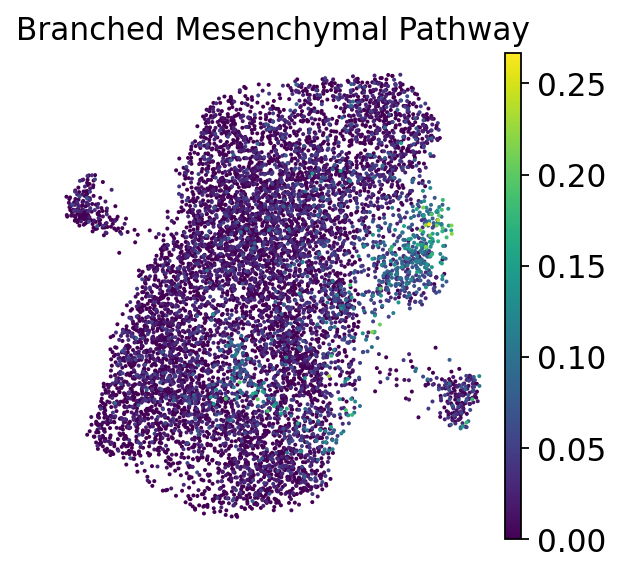

In [71]:
sc.pl.umap(
    adata,
    color=["Branched Mesenchymal Pathway"],
    frameon=False,
    ncols=2,
    wspace = 0.4,
    save='/16992-2D/emp/UMAP_Branched_Mesenchymal_Pathway.pdf'
)
# os.rename("figures/umap/16992-2D/emp/UMAP_Branched_Mesenchymal_Pathway.pdf", 
#           "../results/task3/16992-2D_emp_UMAP_Branched_Mesenchymal_Pathway.pdf")

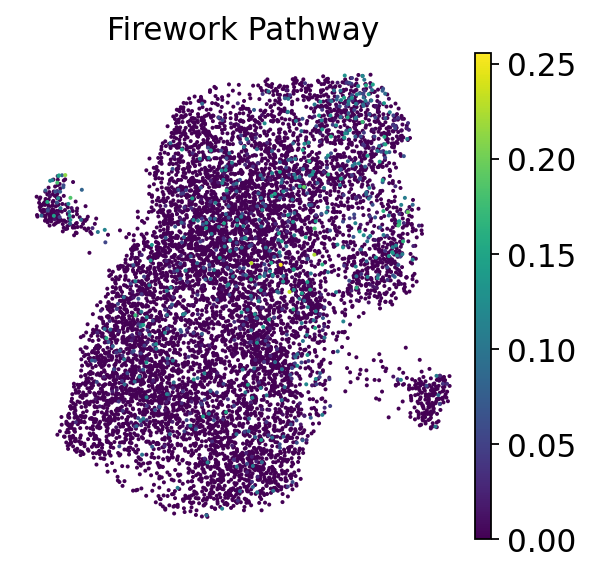

In [72]:
sc.pl.umap(
    adata,
    color=["Firework Pathway"],
    frameon=False,
    ncols=2,
    wspace = 0.4,
    save='/16992-2D/emp/UMAP_Firework_Pathway.pdf'
)
# os.rename("figures/umap/16992-2D/emp/UMAP_Firework_Pathway.pdf", 
#           "../results/task3/16992-2D_emp_UMAP_Firework_Pathway.pdf")

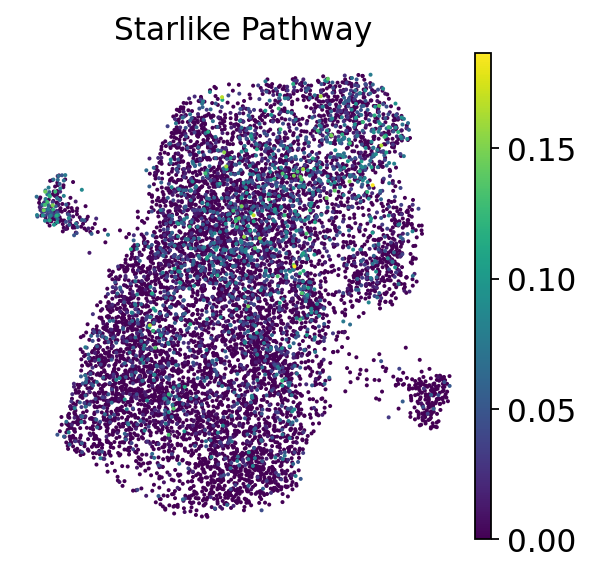

In [73]:
sc.pl.umap(
    adata,
    color=["Starlike Pathway"],
    frameon=False,
    ncols=2,
    wspace = 0.4,
    save='/16992-2D/emp/UMAP_Starlike_Pathway.pdf'
)
# os.rename("figures/umap/16992-2D/emp/UMAP_Starlike_Pathway.pdf", 
#           "../results/task3/16992-2D_emp_UMAP_Starlike_Pathway.pdf")

### New gene sets

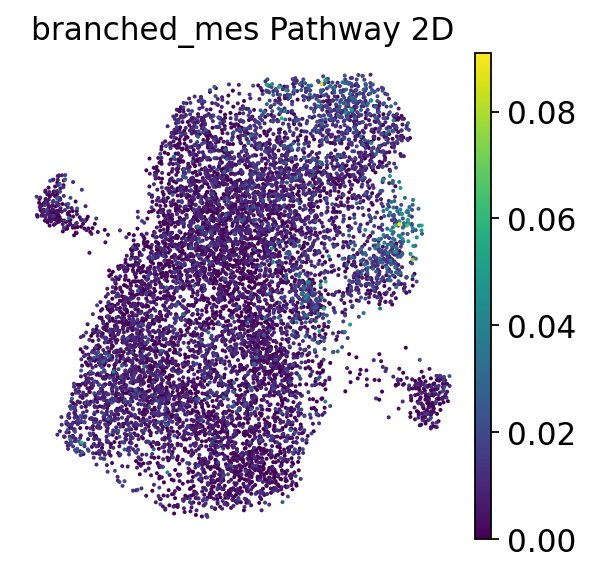

In [74]:
sc.pl.umap(
    adata,
    color=["branched_mes Pathway 2D"],
    frameon=False,
    ncols=2,
    wspace=0.4,
    save='/16992-2D/emp/UMAP_branched_mes_Pathway2D.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_branched_mes_Pathway2D.pdf", 
          "../results/task3/revisions/16992-2D_emp_UMAP_branched_mes_Pathway2D.pdf")


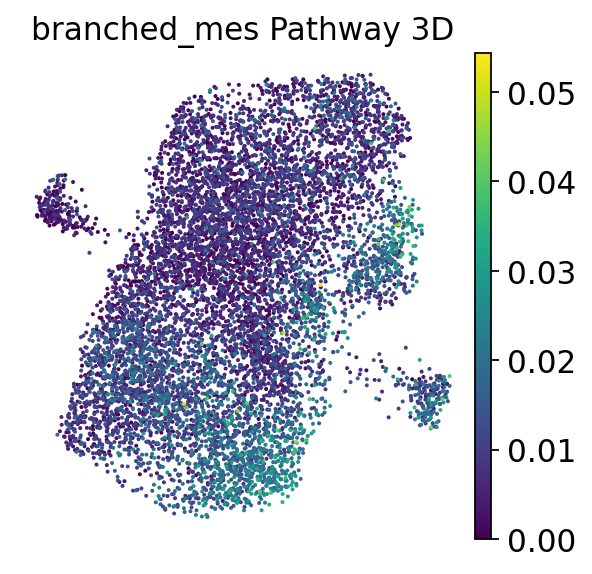

In [75]:
sc.pl.umap(
    adata,
    color=["branched_mes Pathway 3D"],
    frameon=False,
    ncols=2,
    wspace=0.4,
    save='/16992-2D/emp/UMAP_branched_mes_Pathway3D.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_branched_mes_Pathway3D.pdf", 
          "../results/task3/revisions/16992-2D_emp_UMAP_branched_mes_Pathway3D.pdf")


In [76]:
# sc.pl.umap(
#     adata,
#     color=["cystic Pathway 2D"],
#     frameon=False,
#     ncols=2,
#     wspace=0.4,
#     save='/16992-2D/emp/UMAP_cystic_Pathway2D.pdf'
# )
# os.rename("figures/umap/16992-2D/emp/UMAP_cystic_Pathway2D.pdf", 
#           "../results/task3/revisions/16992-2D_emp_UMAP_cystic_Pathway2D.pdf")


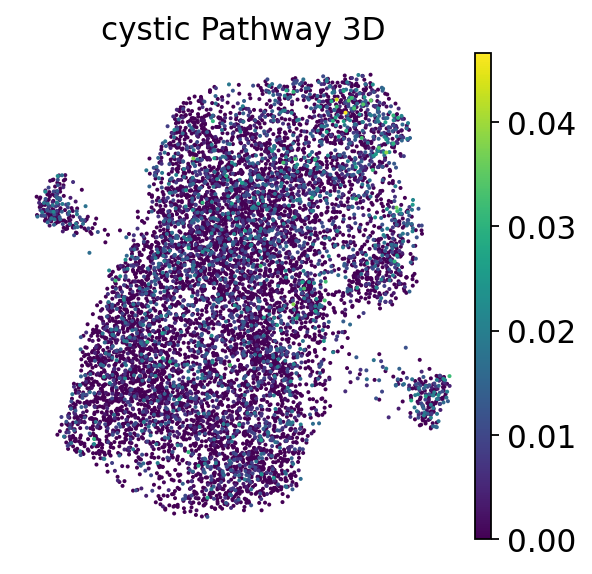

In [77]:
sc.pl.umap(
    adata,
    color=["cystic Pathway 3D"],
    frameon=False,
    ncols=2,
    wspace=0.4,
    save='/16992-2D/emp/UMAP_cystic_Pathway3D.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_cystic_Pathway3D.pdf", 
          "../results/task3/revisions/16992-2D_emp_UMAP_cystic_Pathway3D.pdf")


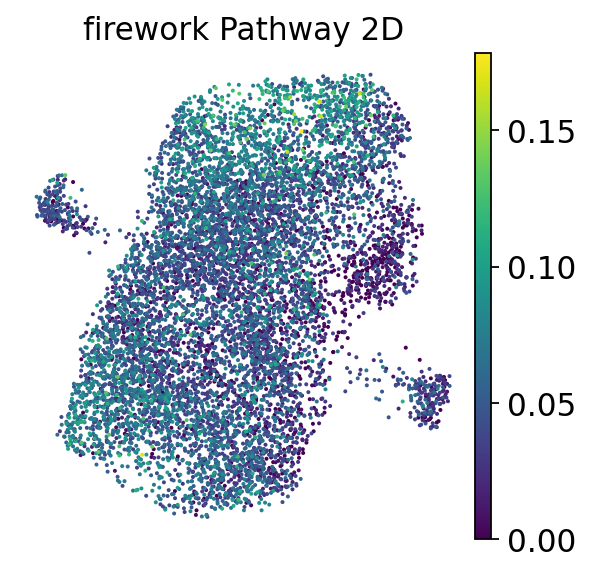

In [78]:
sc.pl.umap(
    adata,
    color=["firework Pathway 2D"],
    frameon=False,
    ncols=2,
    wspace=0.4,
    save='/16992-2D/emp/UMAP_firework_Pathway2D.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_firework_Pathway2D.pdf", 
          "../results/task3/revisions/16992-2D_emp_UMAP_firework_Pathway2D.pdf")


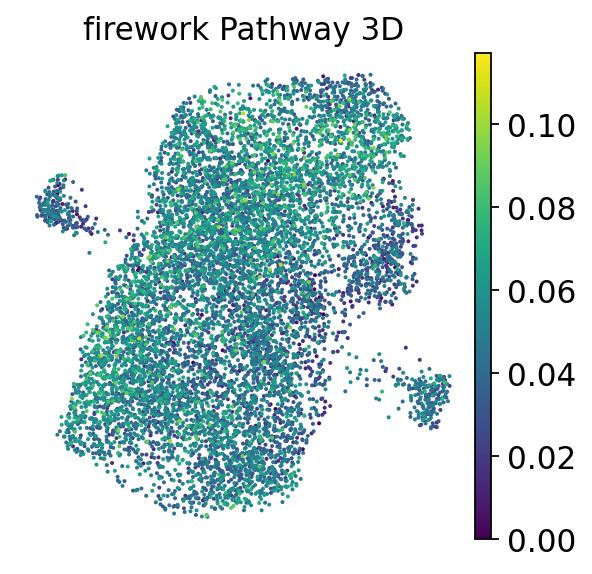

In [79]:
sc.pl.umap(
    adata,
    color=["firework Pathway 3D"],
    frameon=False,
    ncols=2,
    wspace=0.4,
    save='/16992-2D/emp/UMAP_firework_Pathway3D.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_firework_Pathway3D.pdf", 
          "../results/task3/revisions/16992-2D_emp_UMAP_firework_Pathway3D.pdf")


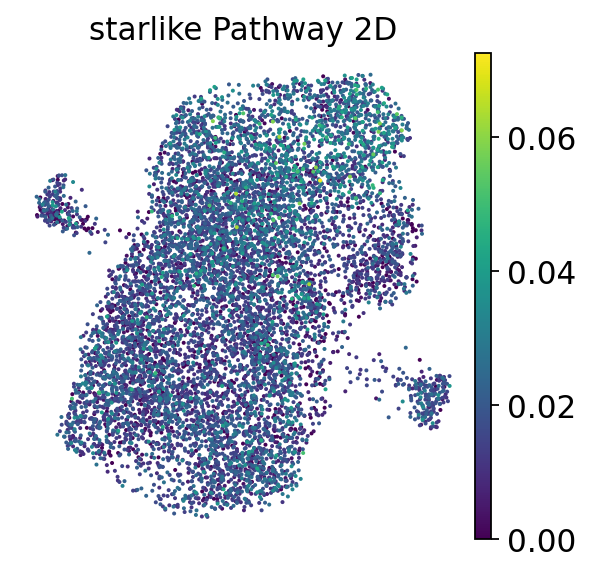

In [80]:
sc.pl.umap(
    adata,
    color=["starlike Pathway 2D"],
    frameon=False,
    ncols=2,
    wspace=0.4,
    save='/16992-2D/emp/UMAP_starlike_Pathway2D.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_starlike_Pathway2D.pdf", 
          "../results/task3/revisions/16992-2D_emp_UMAP_starlike_Pathway2D.pdf")


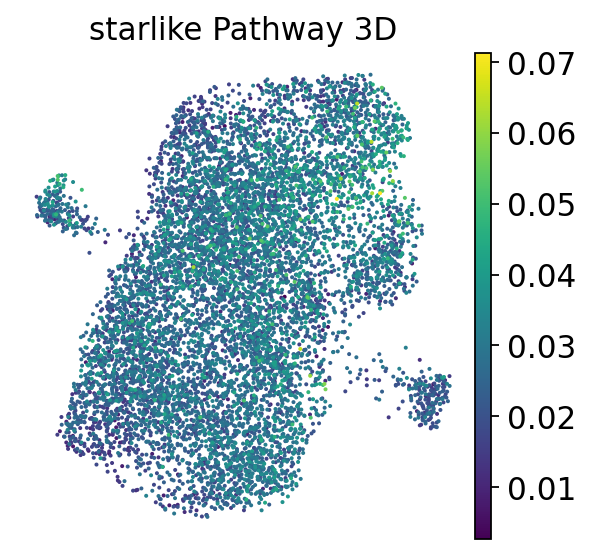

In [81]:
sc.pl.umap(
    adata,
    color=["starlike Pathway 3D"],
    frameon=False,
    ncols=2,
    wspace=0.4,
    save='/16992-2D/emp/UMAP_starlike_Pathway3D.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_starlike_Pathway3D.pdf", 
          "../results/task3/revisions/16992-2D_emp_UMAP_starlike_Pathway3D.pdf")


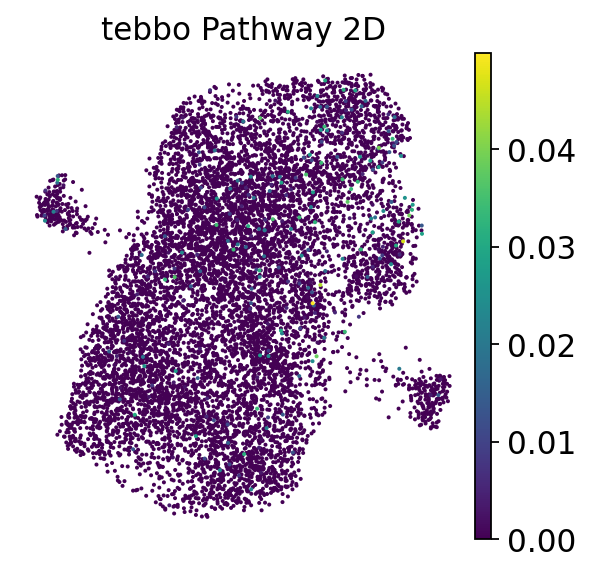

In [82]:
sc.pl.umap(
    adata,
    color=["tebbo Pathway 2D"],
    frameon=False,
    ncols=2,
    wspace=0.4,
    save='/16992-2D/emp/UMAP_tebbo_Pathway2D.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_tebbo_Pathway2D.pdf", 
          "../results/task3/revisions/16992-2D_emp_UMAP_tebbo_Pathway2D.pdf")


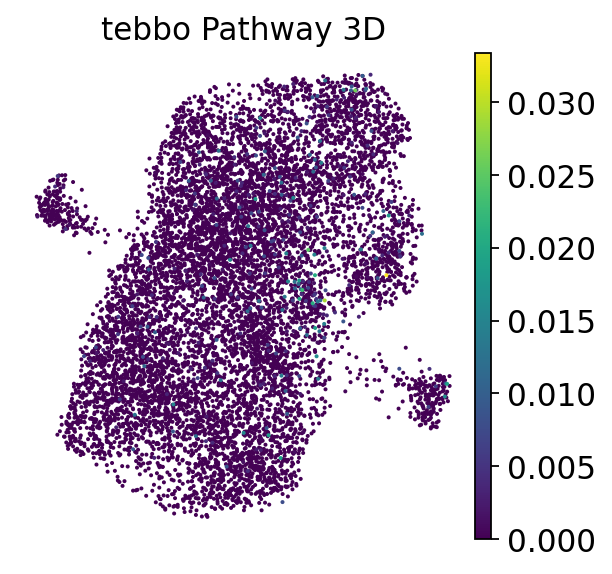

In [83]:
sc.pl.umap(
    adata,
    color=["tebbo Pathway 3D"],
    frameon=False,
    ncols=2,
    wspace=0.4,
    save='/16992-2D/emp/UMAP_tebbo_Pathway3D.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_tebbo_Pathway3D.pdf", 
          "../results/task3/revisions/16992-2D_emp_UMAP_tebbo_Pathway3D.pdf")


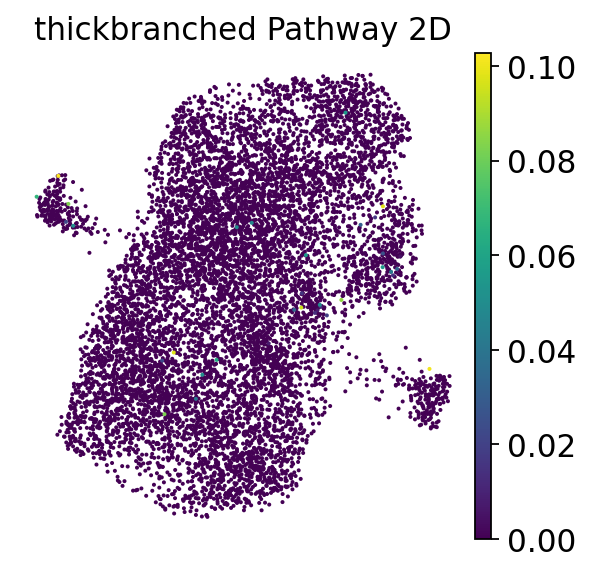

In [84]:
sc.pl.umap(
    adata,
    color=["thickbranched Pathway 2D"],
    frameon=False,
    ncols=2,
    wspace=0.4,
    save='/16992-2D/emp/UMAP_thickbranched_Pathway2D.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_thickbranched_Pathway2D.pdf", 
          "../results/task3/revisions/16992-2D_emp_UMAP_thickbranched_Pathway2D.pdf")


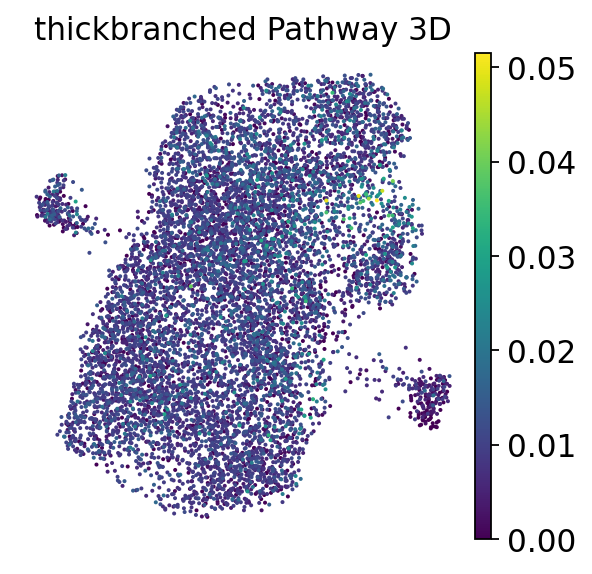

In [85]:
sc.pl.umap(
    adata,
    color=["thickbranched Pathway 3D"],
    frameon=False,
    ncols=2,
    wspace=0.4,
    save='/16992-2D/emp/UMAP_thickbranched_Pathway3D.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_thickbranched_Pathway3D.pdf", 
          "../results/task3/revisions/16992-2D_emp_UMAP_thickbranched_Pathway3D.pdf")


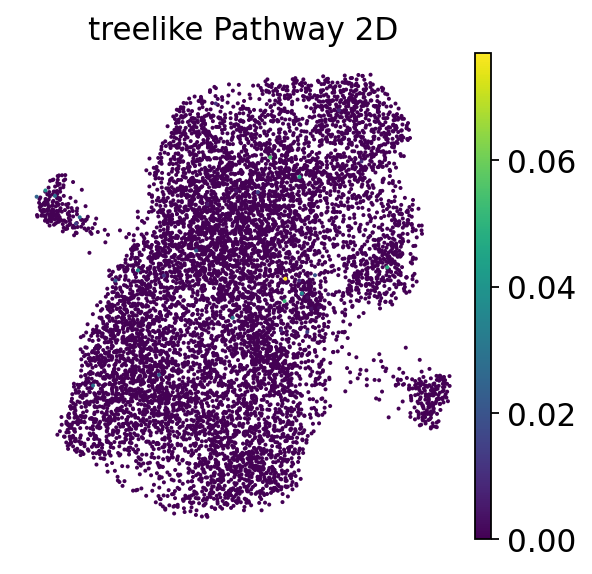

In [86]:
sc.pl.umap(
    adata,
    color=["treelike Pathway 2D"],
    frameon=False,
    ncols=2,
    wspace=0.4,
    save='/16992-2D/emp/UMAP_treelike_Pathway2D.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_treelike_Pathway2D.pdf", 
          "../results/task3/revisions/16992-2D_emp_UMAP_treelike_Pathway2D.pdf")


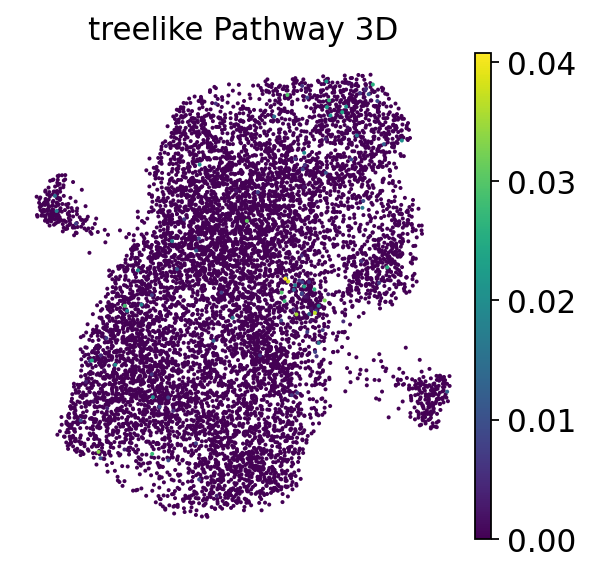

In [87]:
sc.pl.umap(
    adata,
    color=["treelike Pathway 3D"],
    frameon=False,
    ncols=2,
    wspace=0.4,
    save='/16992-2D/emp/UMAP_treelike_Pathway3D.pdf'
)
os.rename("figures/umap/16992-2D/emp/UMAP_treelike_Pathway3D.pdf", 
          "../results/task3/revisions/16992-2D_emp_UMAP_treelike_Pathway3D.pdf")


## Violin

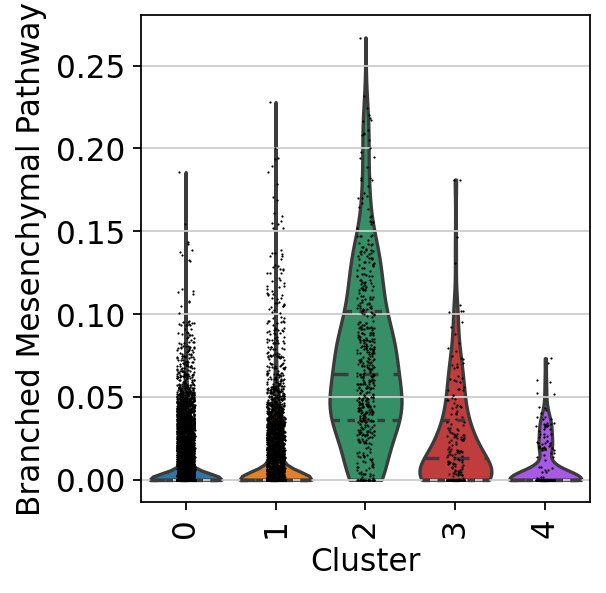

In [88]:
sc.pl.violin(adata, 
             keys=["Branched Mesenchymal Pathway"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace = 0.4,
             save='/16992-2D/emp_violin_counts_UMAP_Branched_Mesenchymal_Pathway.pdf'
            )
# os.rename("figures/violin/16992-2D/emp_violin_counts_UMAP_Branched_Mesenchymal_Pathway.pdf", 
#           "../results/task3/16992-2D_emp_violin_counts_UMAP_Branched_Mesenchymal_Pathway.pdf")

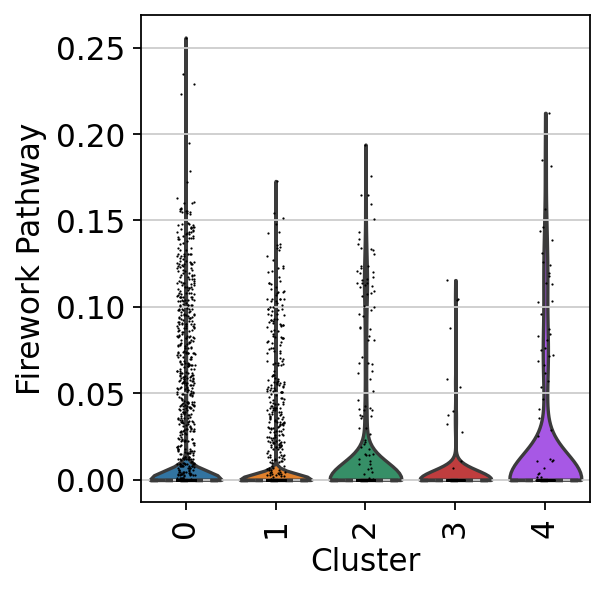

In [89]:
sc.pl.violin(adata, 
             keys=["Firework Pathway"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace = 0.4,
             save='/16992-2D/emp_violin_counts_Firework_Pathway.pdf'
            )
# os.rename("figures/violin/16992-2D/emp_violin_counts_Firework_Pathway.pdf", 
#           "../results/task3/16992-2D_emp_violin_counts_Firework_Pathway.pdf")

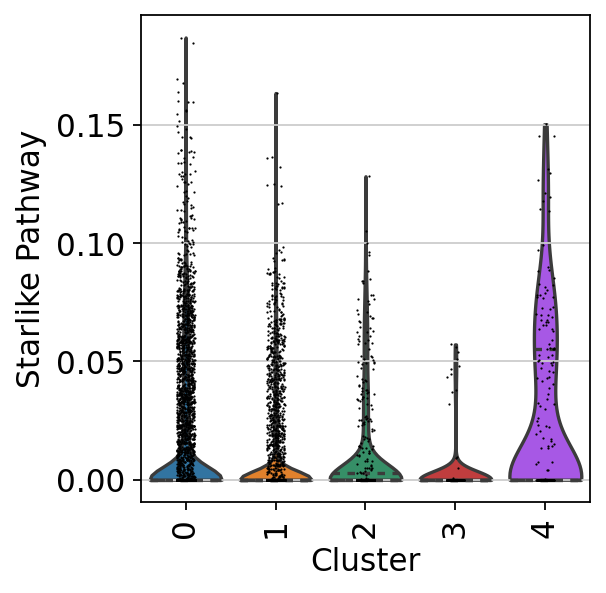

In [90]:
sc.pl.violin(adata, 
             keys=["Starlike Pathway"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace = 0.4,
             save='/16992-2D/emp_violin_counts_Starlike_Pathway.pdf'
            )
# os.rename("figures/violin/16992-2D/emp_violin_counts_Starlike_Pathway.pdf", 
#           "../results/task3/16992-2D_emp_violin_counts_Starlike_Pathway.pdf")

### New

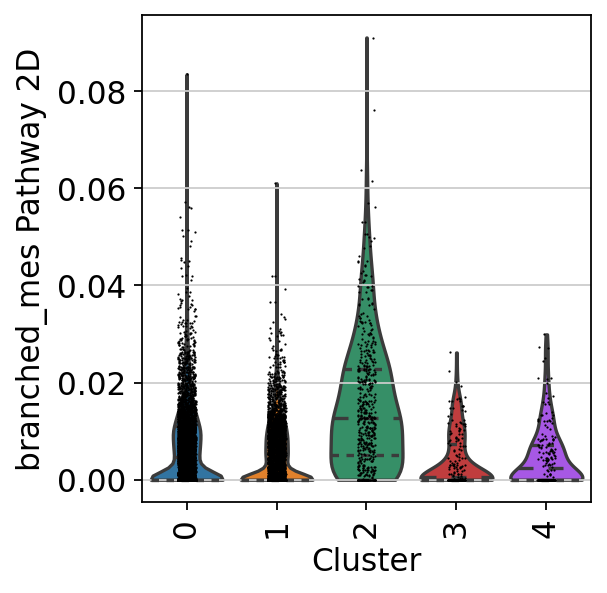

In [91]:
sc.pl.violin(adata, 
             keys=["branched_mes Pathway 2D"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace=0.4,
             save='/16992-2D/emp_violin_counts_UMAP_branched_mes_Pathway2D.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_UMAP_branched_mes_Pathway2D.pdf", 
          "../results/task3/revisions/16992-2D_emp_violin_counts_UMAP_branched_mes_Pathway2D.pdf")


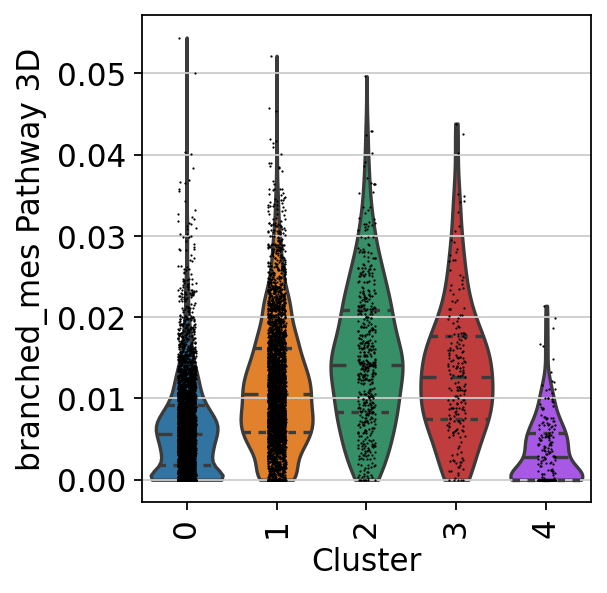

In [92]:
sc.pl.violin(adata, 
             keys=["branched_mes Pathway 3D"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace=0.4,
             save='/16992-2D/emp_violin_counts_UMAP_branched_mes_Pathway3D.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_UMAP_branched_mes_Pathway3D.pdf", 
          "../results/task3/revisions/16992-2D_emp_violin_counts_UMAP_branched_mes_Pathway3D.pdf")


In [94]:
# sc.pl.violin(adata, 
#              keys=["cystic Pathway 2D"],
#              groupby='Cluster', 
#              rotation=90,
#              xlabel='Cluster',
#              inner="quartile",
#              wspace=0.4,
#              save='/16992-2D/emp_violin_counts_UMAP_cystic_Pathway2D.pdf'
#             )
# os.rename("figures/violin/16992-2D/emp_violin_counts_UMAP_cystic_Pathway2D.pdf", 
#           "../results/task3/revisions/16992-2D_emp_violin_counts_UMAP_cystic_Pathway2D.pdf")


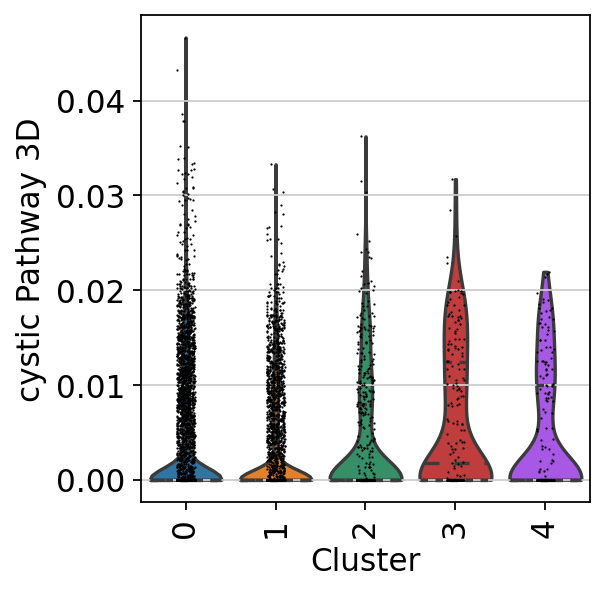

In [95]:
sc.pl.violin(adata, 
             keys=["cystic Pathway 3D"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace=0.4,
             save='/16992-2D/emp_violin_counts_UMAP_cystic_Pathway3D.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_UMAP_cystic_Pathway3D.pdf", 
          "../results/task3/revisions/16992-2D_emp_violin_counts_UMAP_cystic_Pathway3D.pdf")


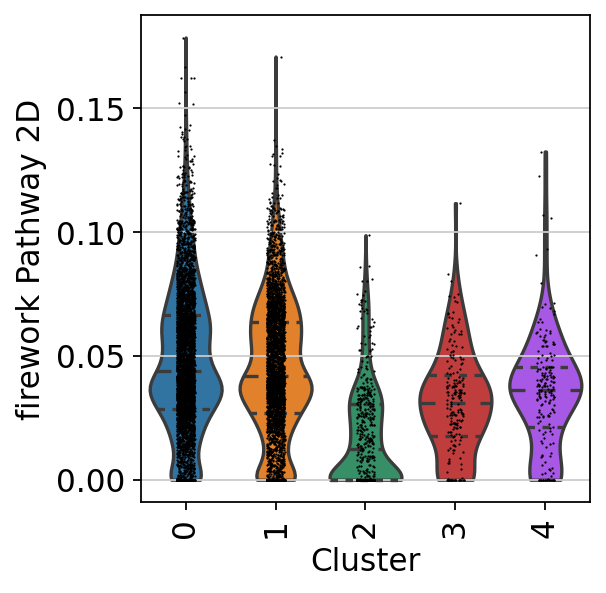

In [96]:
sc.pl.violin(adata, 
             keys=["firework Pathway 2D"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace=0.4,
             save='/16992-2D/emp_violin_counts_UMAP_firework_Pathway2D.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_UMAP_firework_Pathway2D.pdf", 
          "../results/task3/revisions/16992-2D_emp_violin_counts_UMAP_firework_Pathway2D.pdf")


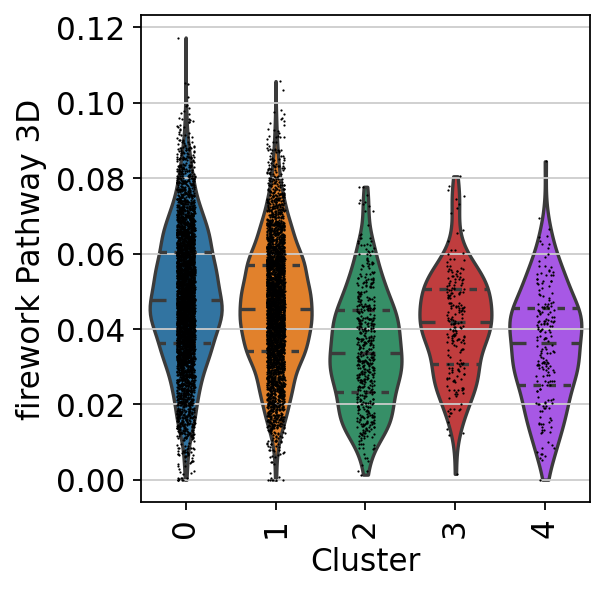

In [97]:
sc.pl.violin(adata, 
             keys=["firework Pathway 3D"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace=0.4,
             save='/16992-2D/emp_violin_counts_UMAP_firework_Pathway3D.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_UMAP_firework_Pathway3D.pdf", 
          "../results/task3/revisions/16992-2D_emp_violin_counts_UMAP_firework_Pathway3D.pdf")


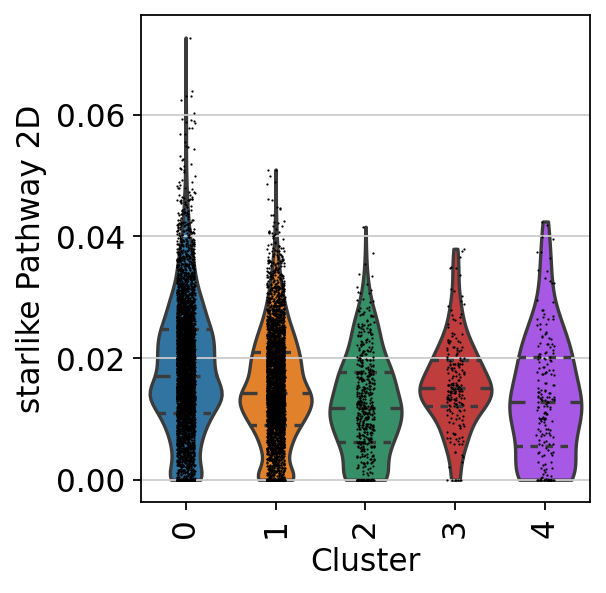

In [98]:
sc.pl.violin(adata, 
             keys=["starlike Pathway 2D"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace=0.4,
             save='/16992-2D/emp_violin_counts_UMAP_starlike_Pathway2D.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_UMAP_starlike_Pathway2D.pdf", 
          "../results/task3/revisions/16992-2D_emp_violin_counts_UMAP_starlike_Pathway2D.pdf")


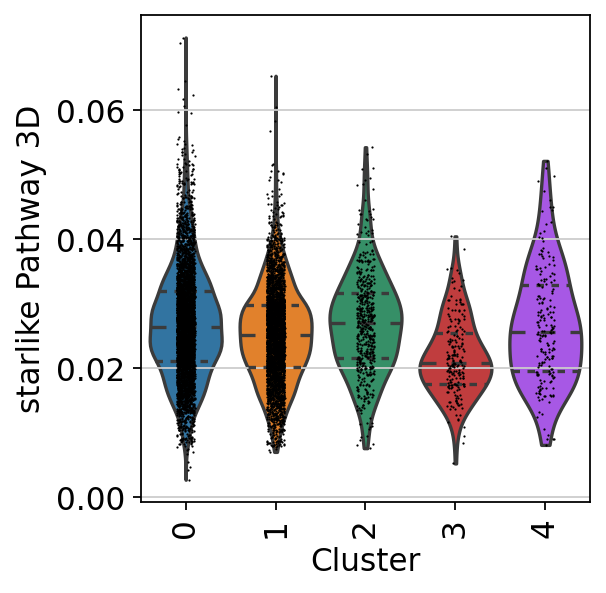

In [99]:
sc.pl.violin(adata, 
             keys=["starlike Pathway 3D"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace=0.4,
             save='/16992-2D/emp_violin_counts_UMAP_starlike_Pathway3D.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_UMAP_starlike_Pathway3D.pdf", 
          "../results/task3/revisions/16992-2D_emp_violin_counts_UMAP_starlike_Pathway3D.pdf")


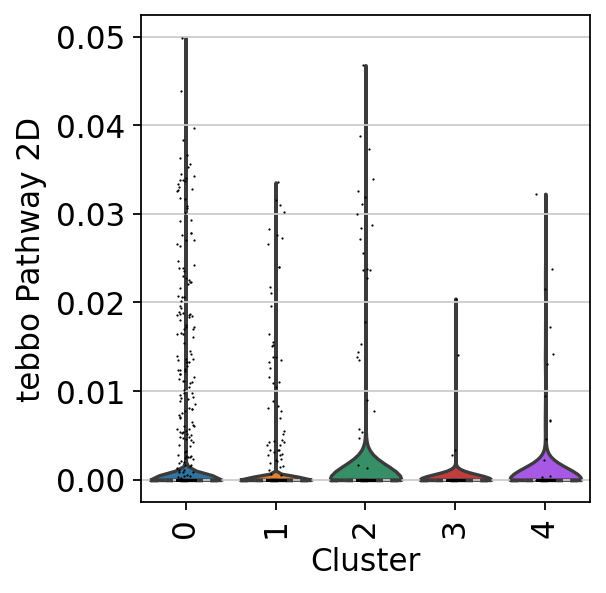

In [100]:
sc.pl.violin(adata, 
             keys=["tebbo Pathway 2D"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace=0.4,
             save='/16992-2D/emp_violin_counts_UMAP_tebbo_Pathway2D.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_UMAP_tebbo_Pathway2D.pdf", 
          "../results/task3/revisions/16992-2D_emp_violin_counts_UMAP_tebbo_Pathway2D.pdf")


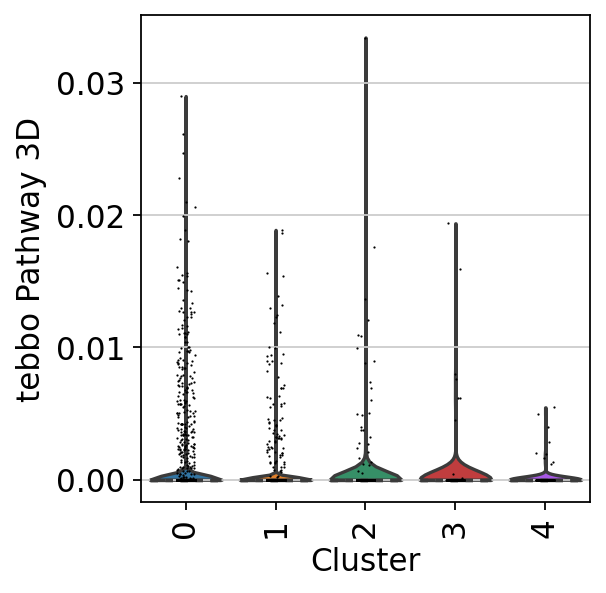

In [101]:
sc.pl.violin(adata, 
             keys=["tebbo Pathway 3D"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace=0.4,
             save='/16992-2D/emp_violin_counts_UMAP_tebbo_Pathway3D.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_UMAP_tebbo_Pathway3D.pdf", 
          "../results/task3/revisions/16992-2D_emp_violin_counts_UMAP_tebbo_Pathway3D.pdf")


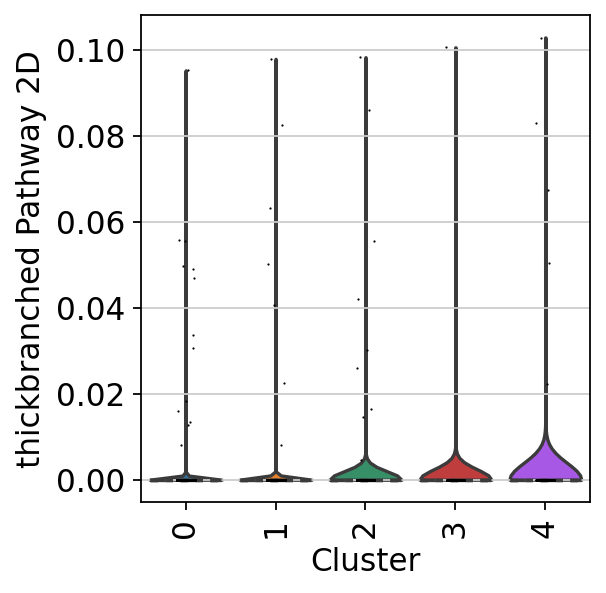

In [102]:
sc.pl.violin(adata, 
             keys=["thickbranched Pathway 2D"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace=0.4,
             save='/16992-2D/emp_violin_counts_UMAP_thickbranched_Pathway2D.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_UMAP_thickbranched_Pathway2D.pdf", 
          "../results/task3/revisions/16992-2D_emp_violin_counts_UMAP_thickbranched_Pathway2D.pdf")


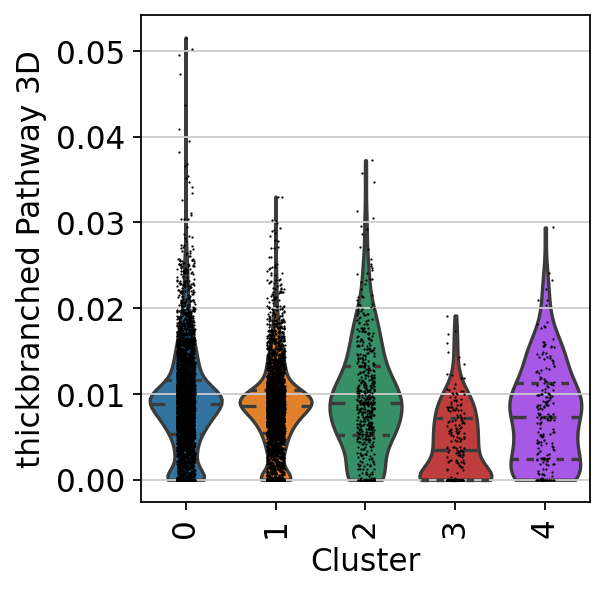

In [103]:
sc.pl.violin(adata, 
             keys=["thickbranched Pathway 3D"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace=0.4,
             save='/16992-2D/emp_violin_counts_UMAP_thickbranched_Pathway3D.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_UMAP_thickbranched_Pathway3D.pdf", 
          "../results/task3/revisions/16992-2D_emp_violin_counts_UMAP_thickbranched_Pathway3D.pdf")


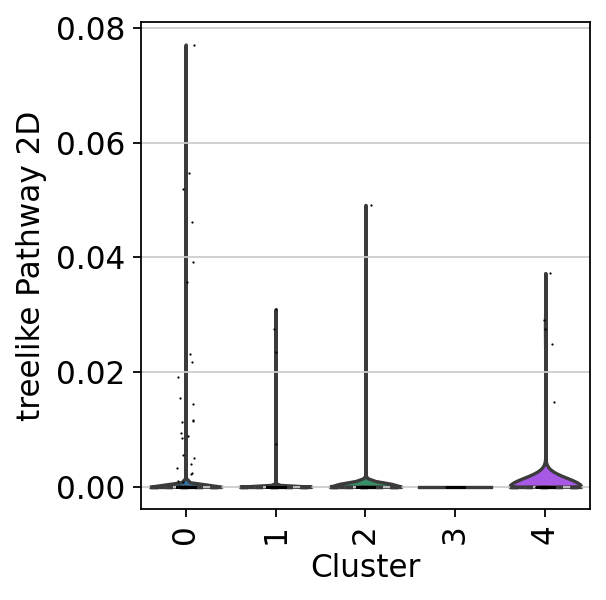

In [104]:
sc.pl.violin(adata, 
             keys=["treelike Pathway 2D"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace=0.4,
             save='/16992-2D/emp_violin_counts_UMAP_treelike_Pathway2D.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_UMAP_treelike_Pathway2D.pdf", 
          "../results/task3/revisions/16992-2D_emp_violin_counts_UMAP_treelike_Pathway2D.pdf")


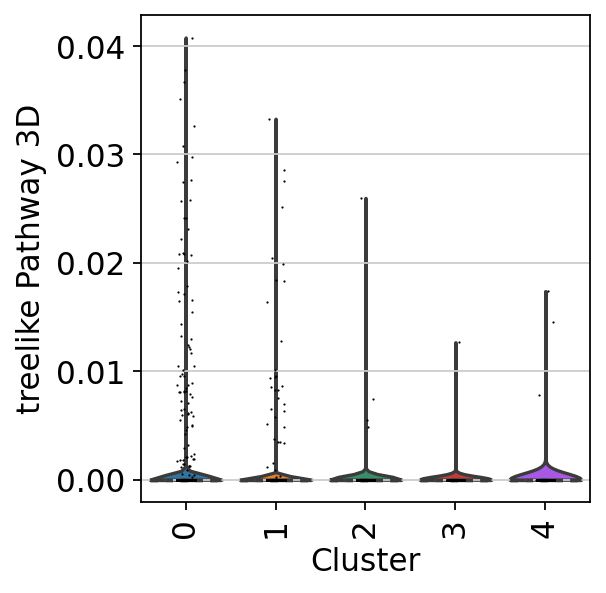

In [105]:
sc.pl.violin(adata, 
             keys=["treelike Pathway 3D"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace=0.4,
             save='/16992-2D/emp_violin_counts_UMAP_treelike_Pathway3D.pdf'
            )
os.rename("figures/violin/16992-2D/emp_violin_counts_UMAP_treelike_Pathway3D.pdf", 
          "../results/task3/revisions/16992-2D_emp_violin_counts_UMAP_treelike_Pathway3D.pdf")
